In [4]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import numpy as np

from csv_reader import *
from csv_setup import *

In [6]:
bike_sharing_df = get_bike_sharing_df_clean()
bike_sharing_df.head(3)

hr  holiday  workingday  weathersit   atemp   hum  windspeed  cnt  no_snow  \
0   0        0           0           1  0.2879  0.81        0.0   16        0   
1   1        0           0           1  0.2727  0.80        0.0   40        0   
2   2        0           0           1  0.2727  0.80        0.0   32        0   

   medium_snow  heavy_snow  
0            0           1  
1            0           1  
2            0           1

In [4]:
bike_sharing_df_full = get_bike_sharing_df()
bike_sharing_df_full.head(3)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

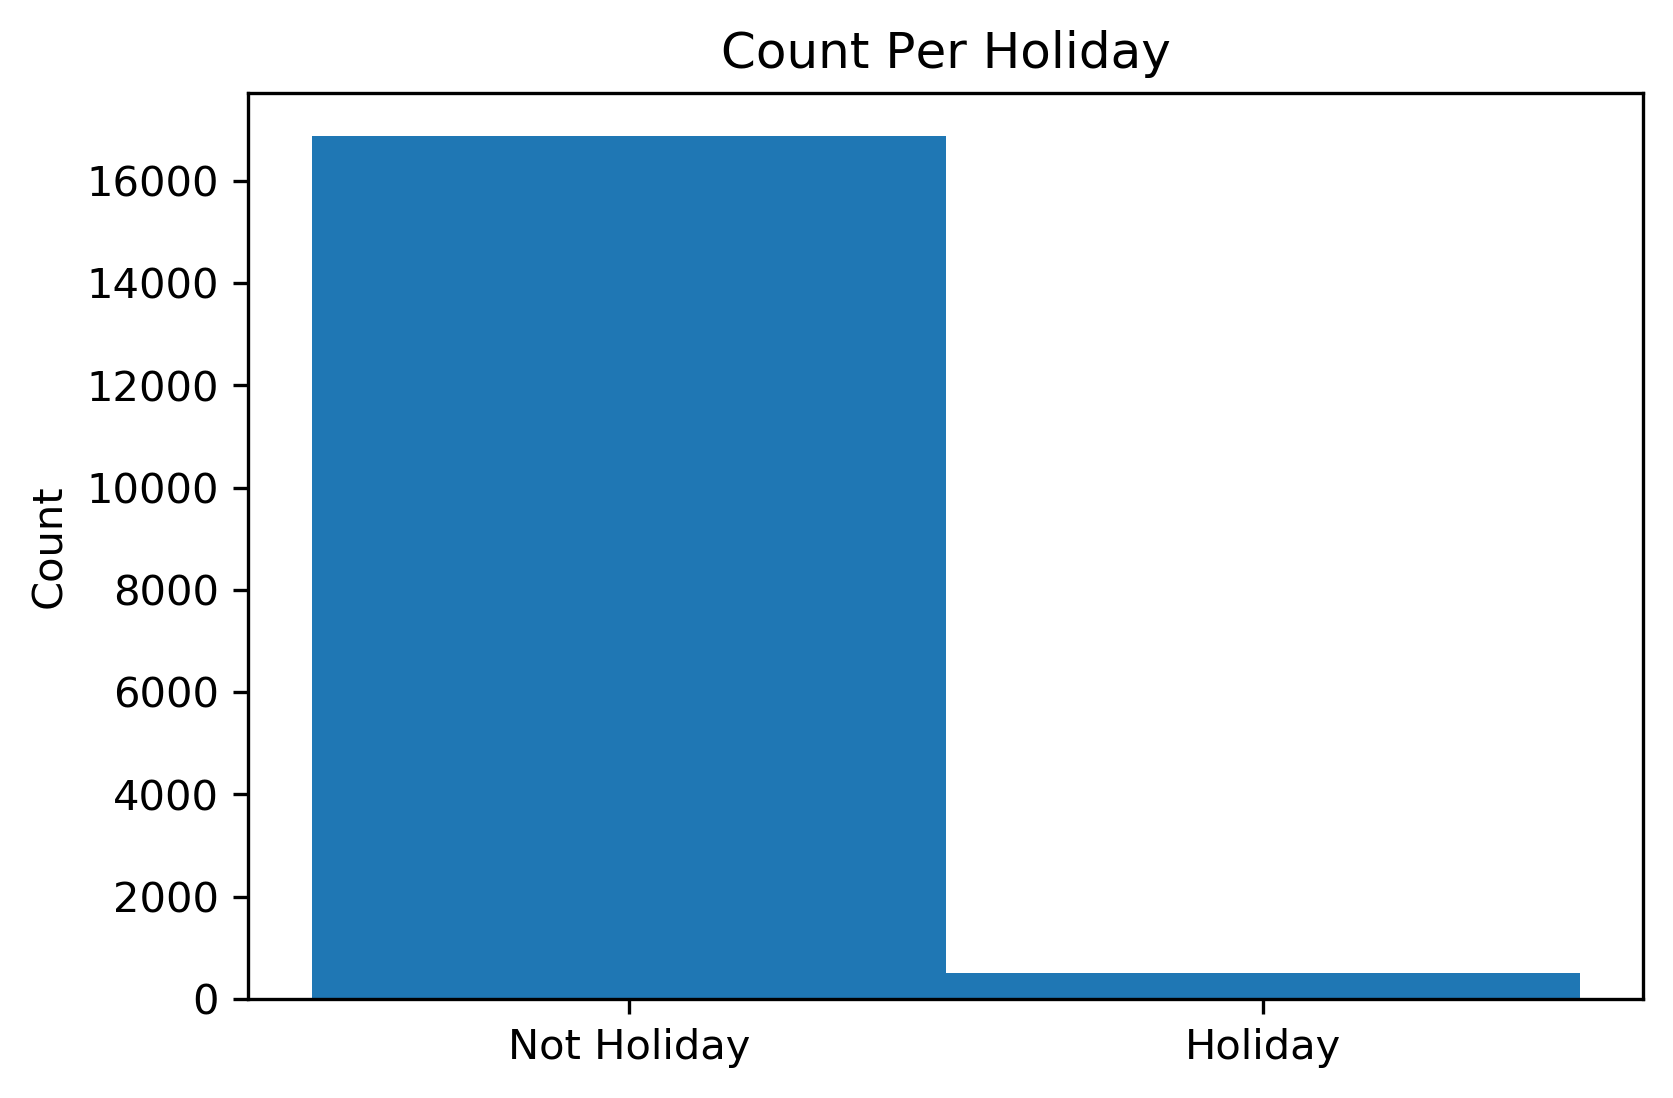

In [61]:
plt.hist(bike_sharing_df.holiday, bins=[-.5,.5,1.5])
plt.xticks([0,1], ['Not Holiday', 'Holiday'])
#set_xticklabels(('Not Holiday', 'Holiday'))

plt.title("Count Per Holiday")
plt.ylabel('Count')

plt.show()

cnt    223
Name: 4, dtype: int64


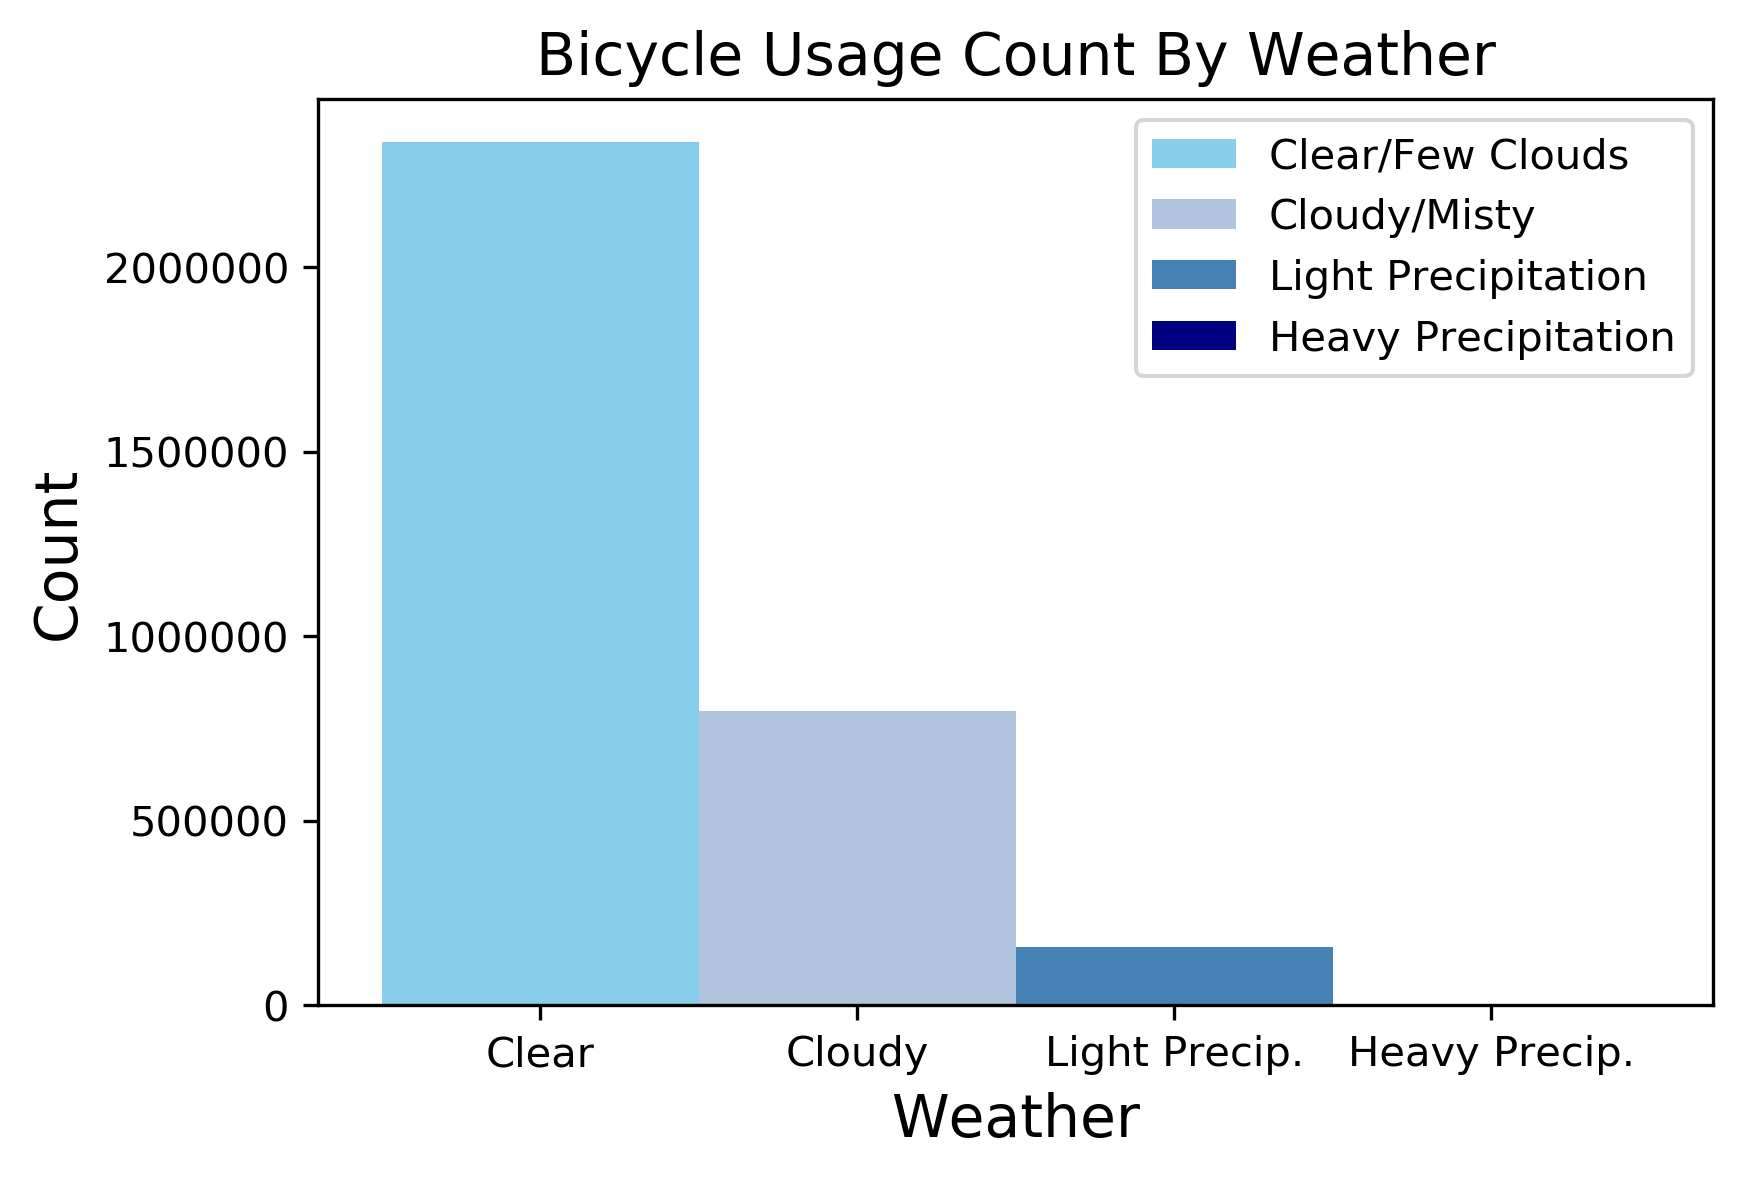

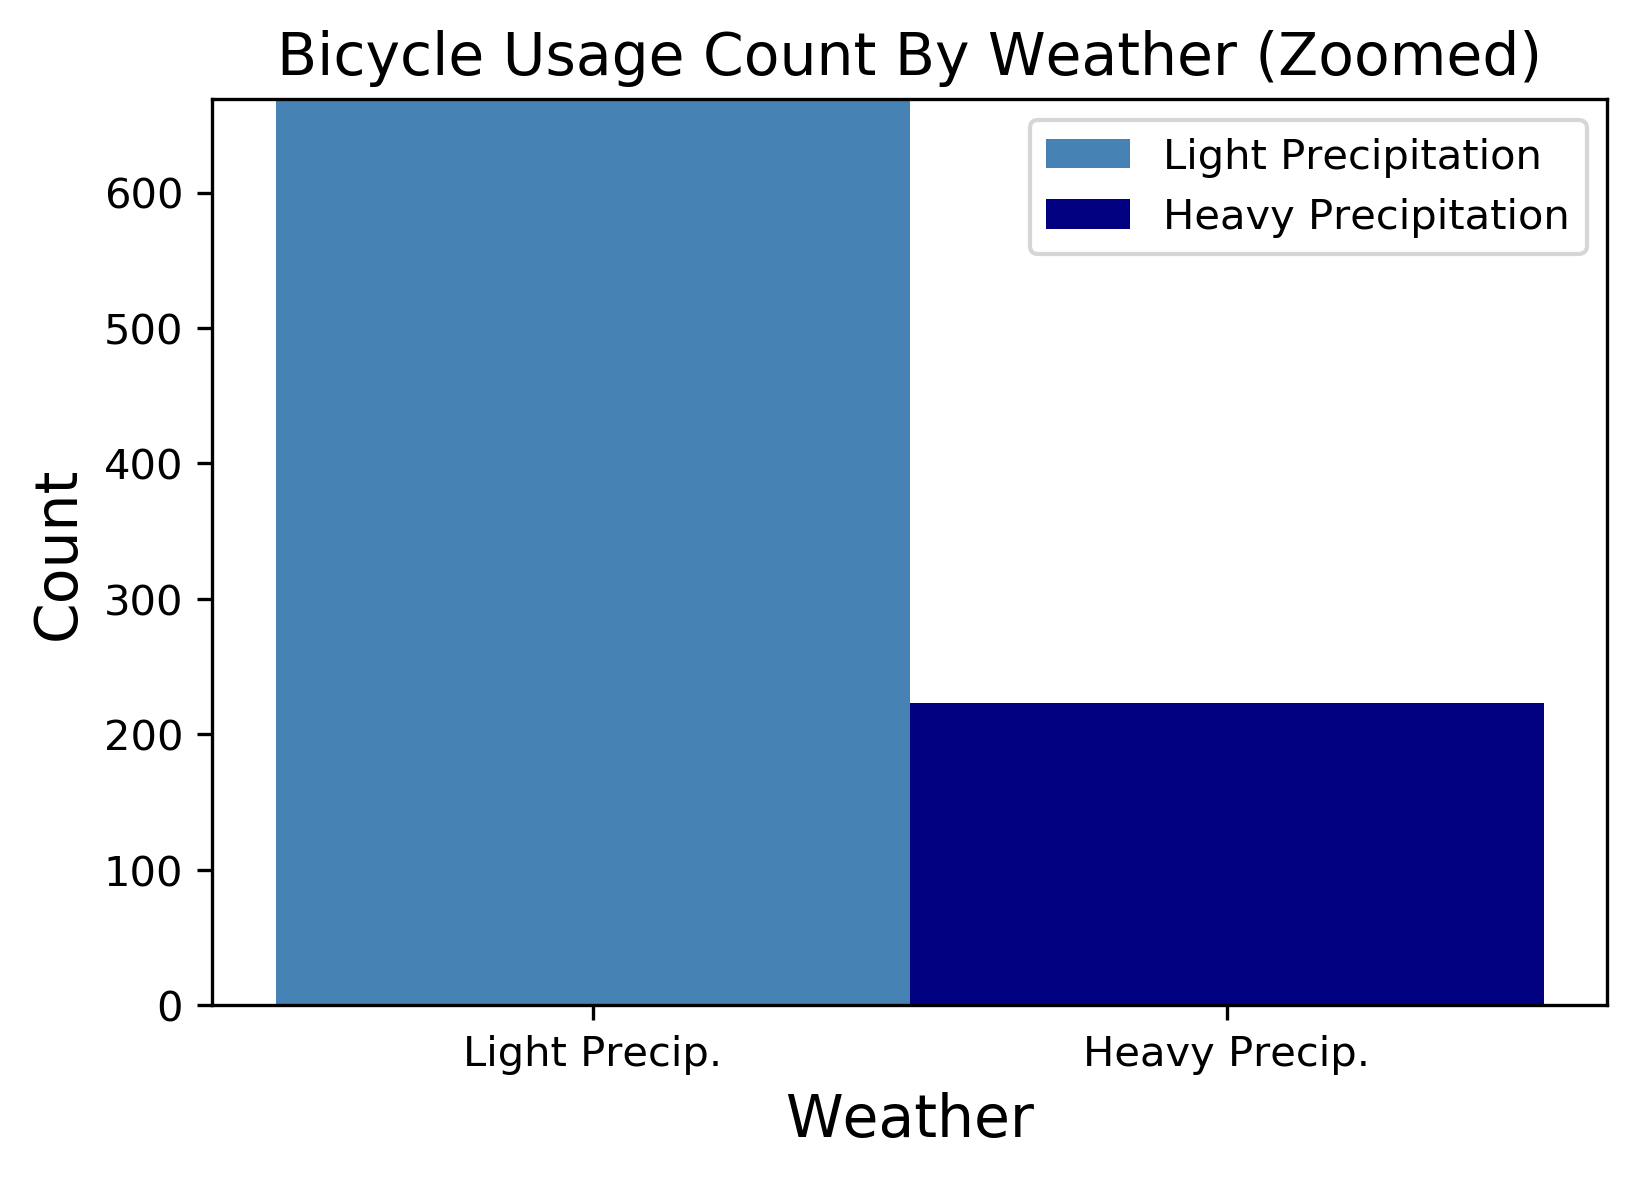

In [105]:
# Groupby weather and sum
weather_df = bike_sharing_df[['weathersit', 'cnt']]
weather_gk = weather_df.groupby('weathersit')
weather_XY = weather_gk.sum()

# Graph histogram for each weather type
labels = ['Clear/Few Clouds', 'Cloudy/Misty', 'Light Precipitation', 'Heavy Precipitation']
colors = ['skyblue', 'lightsteelblue', 'steelblue', 'navy']
for i in weather_XY.index.values.tolist():
    plt.hist(i, bins=[-.5 + i,.5 + i], weights=weather_XY.loc[i], color=colors[i-1], label=labels[i-1])
    
# Graph beautification
# Labels
plt.title("Bicycle Usage Count By Weather", fontsize=14)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Count', fontsize=14)
tickLabels = ['Clear', 'Cloudy', 'Light Precip.', 'Heavy Precip.']
plt.xticks([1, 2, 3, 4], tickLabels)

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

# Second histogram to show values for Heavy Precip.
for i in range(3,5):
    plt.hist(i, bins=[-.5 + i,.5 + i], weights=weather_XY.loc[i], color=colors[i-1], label=labels[i-1])
    
# Graph beautification
# Labels
plt.title("Bicycle Usage Count By Weather (Zoomed)", fontsize=14)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(3,5), [tickLabels[2], tickLabels[3]])
plt.ylim([0, weather_XY.loc[4].cnt * 3])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

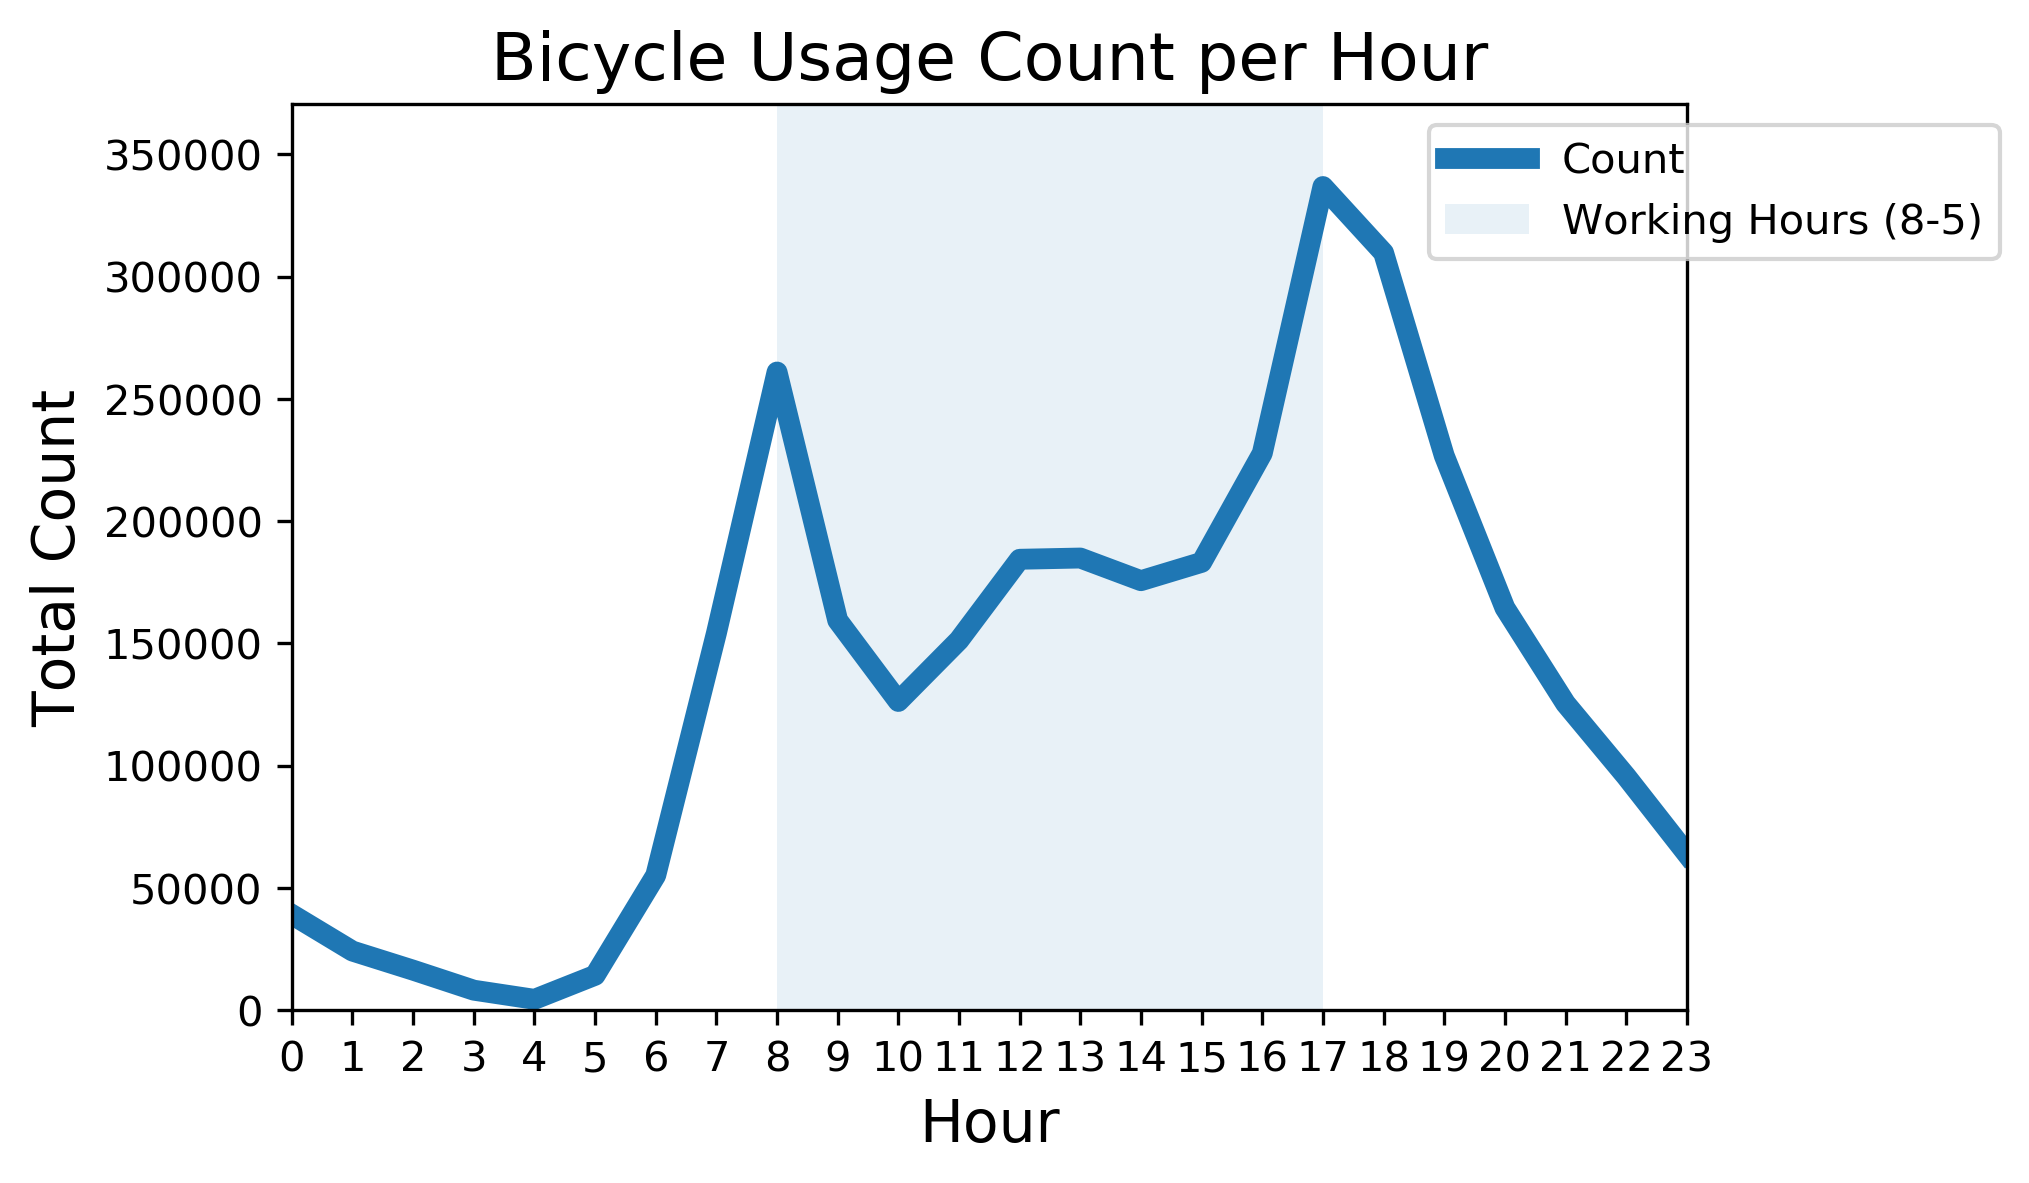

In [122]:
# Sum for each hour
hour_df = bike_sharing_df[['hr','cnt']]
hour_gk = hour_df.groupby('hr')
hour_XY = hour_gk.sum()

# Plot change in count over hour
plt.plot(hour_XY.index.values.tolist(), hour_XY.cnt, lw=5, label='Count')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(hour_XY.cnt) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(hour_XY.cnt) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.8, 1.0))

plt.show()

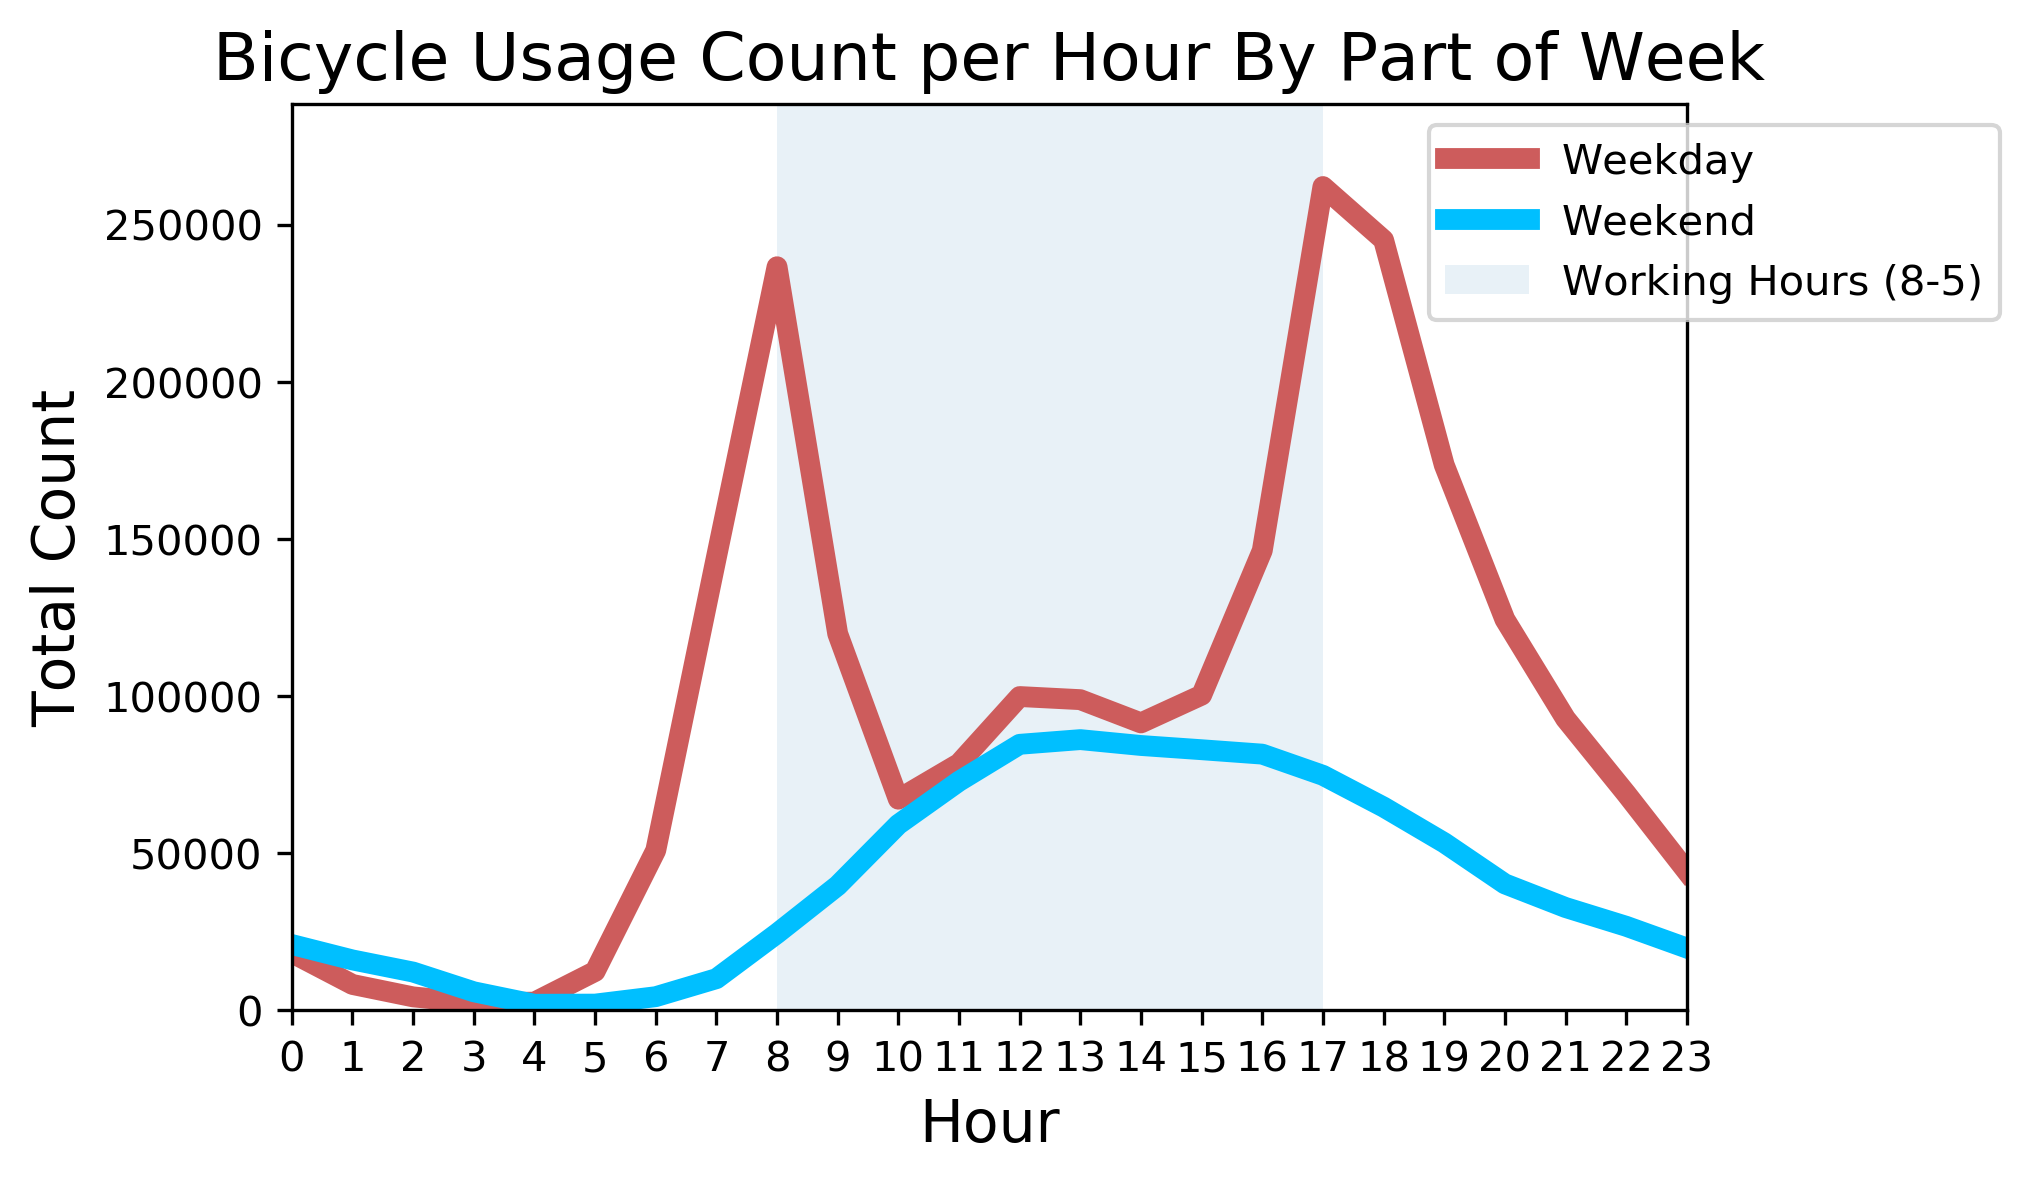

In [123]:
# Split up df into weekday and weekend
weekday_df = bike_sharing_df.loc[bike_sharing_df['workingday'] == 1]
weekend_df = bike_sharing_df.loc[bike_sharing_df['workingday'] == 0]

# Groupby hr
weekday_gk = weekday_df[['hr', 'cnt']].groupby('hr')
weekend_gk = weekend_df[['hr', 'cnt']].groupby('hr')

# Sums for each hour
weekday_XY = weekday_gk.sum()
weekend_XY = weekend_gk.sum()
X = weekday_XY.index.values.tolist()
weekday_Y = weekday_XY.cnt
weekend_Y = weekend_XY.cnt

# Plot change in count over hour for both weekdays and weekends
plt.plot(X, weekday_Y, color='indianred', lw=5, label='Weekday')
plt.plot(X, weekend_Y, color='deepskyblue', lw=5, label='Weekend')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(weekday_Y) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour By Part of Week', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(weekday_Y) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.8, 1.0))

plt.show()

Index(['cnt'], dtype='object')


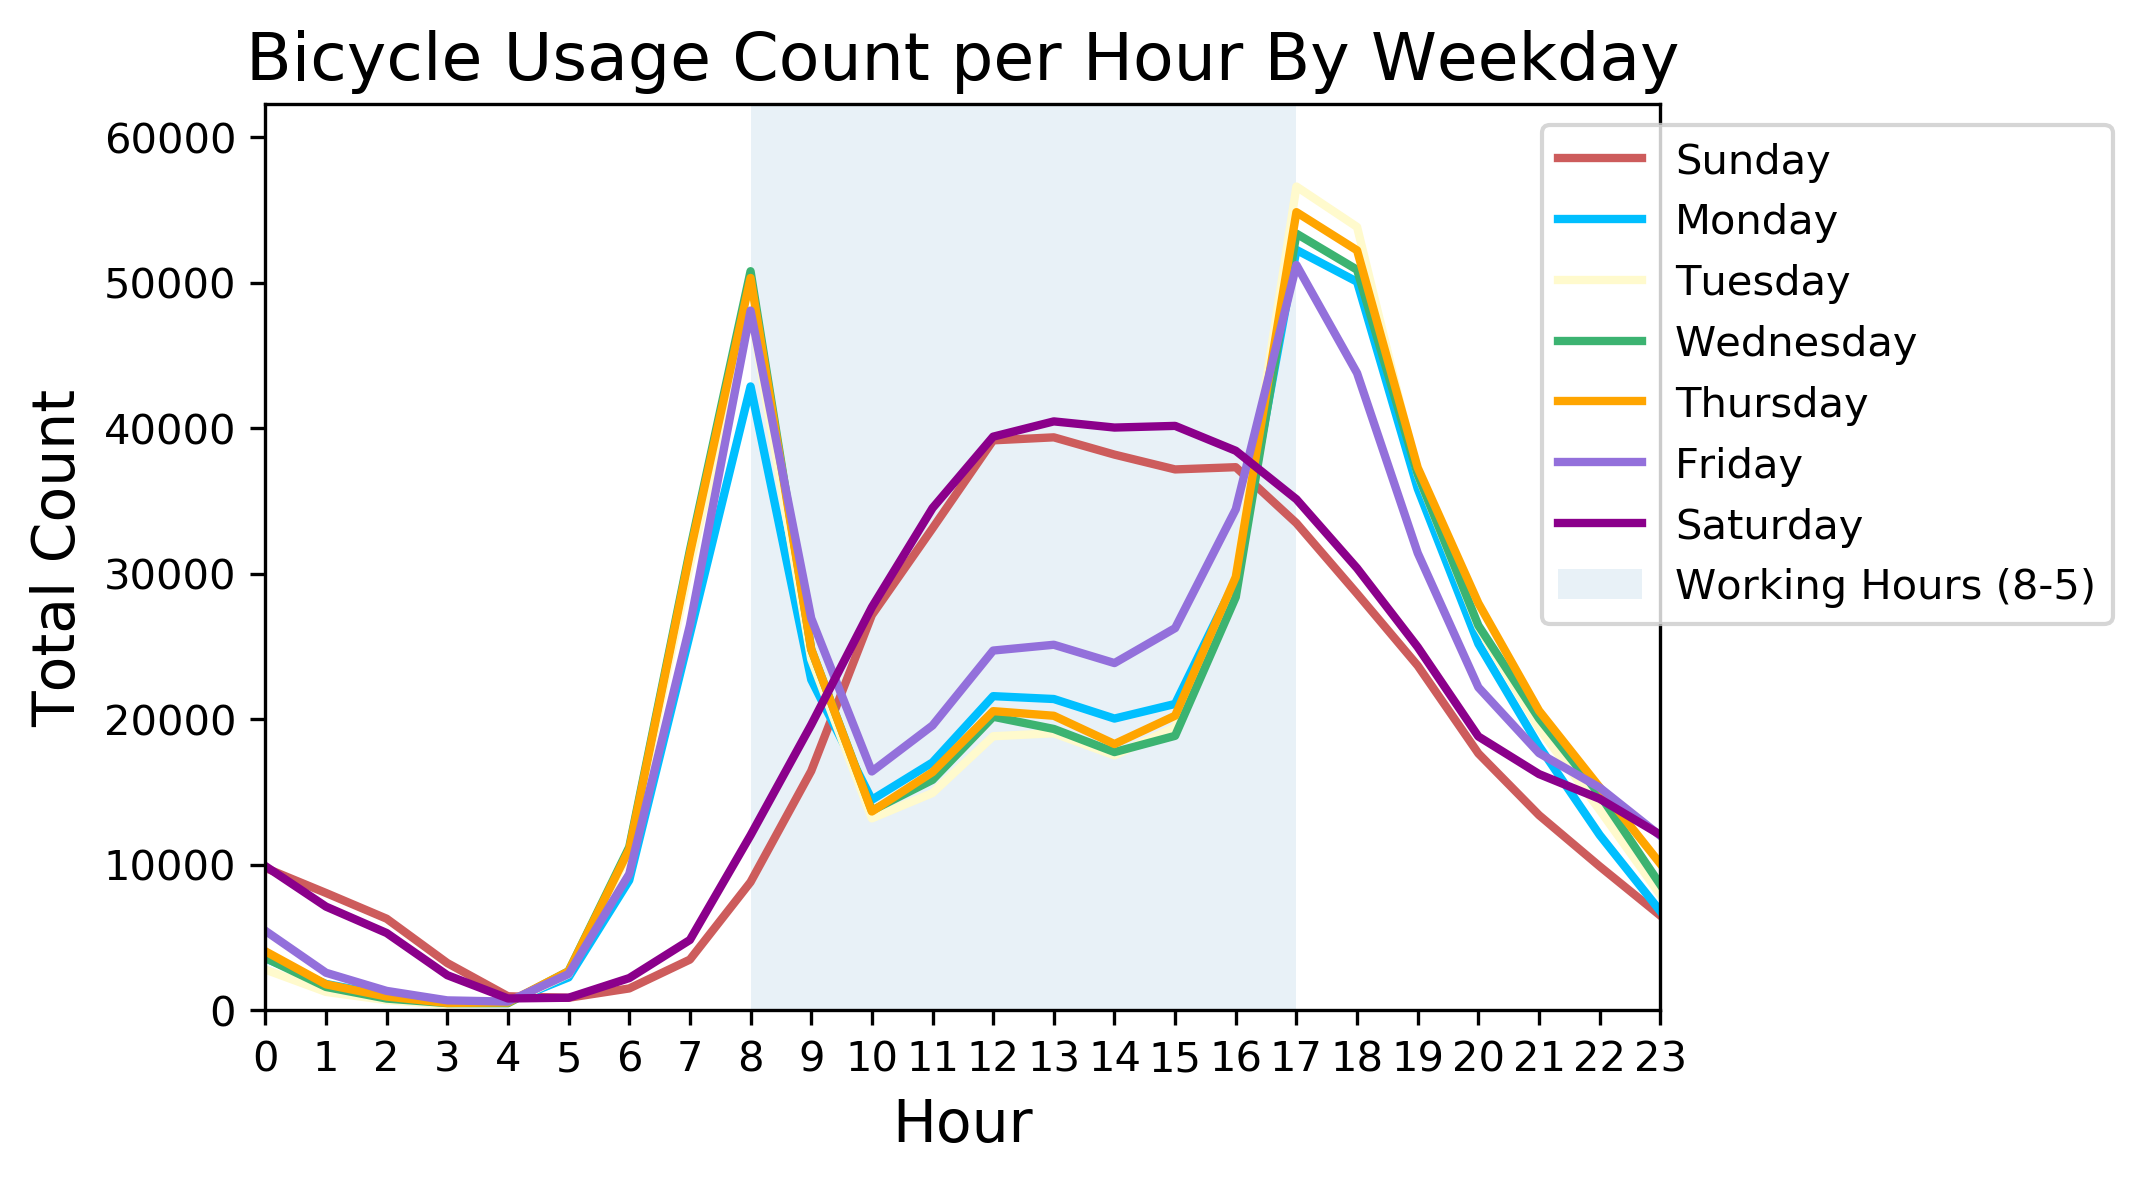

In [124]:
# Groupby hr
daysOfWeek_gk = bike_sharing_df_full[['hr', 'weekday', 'cnt']].groupby(['weekday', 'hr'])

# Sums for each hour
daysOfWeek_XY = daysOfWeek_gk.sum()
print(daysOfWeek_XY.columns.get_level_values(0))

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['plum', 'deepskyblue', 'lemonchiffon', 'mediumseagreen', 'orange', 'mediumpurple', 'darkmagenta']

# Plot line for each day of week
for i in range(7):
    daysOfWeek_X = list(range(24))
    daysOfWeek_XY_Y = daysOfWeek_XY.loc[i, :]
    plt.plot(daysOfWeek_X, daysOfWeek_XY_Y, color=colors[i], lw=2, label=days[i])

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(daysOfWeek_XY.cnt) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour By Weekday', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(24))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(daysOfWeek_XY.cnt) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0.9, 1.0))

plt.show()

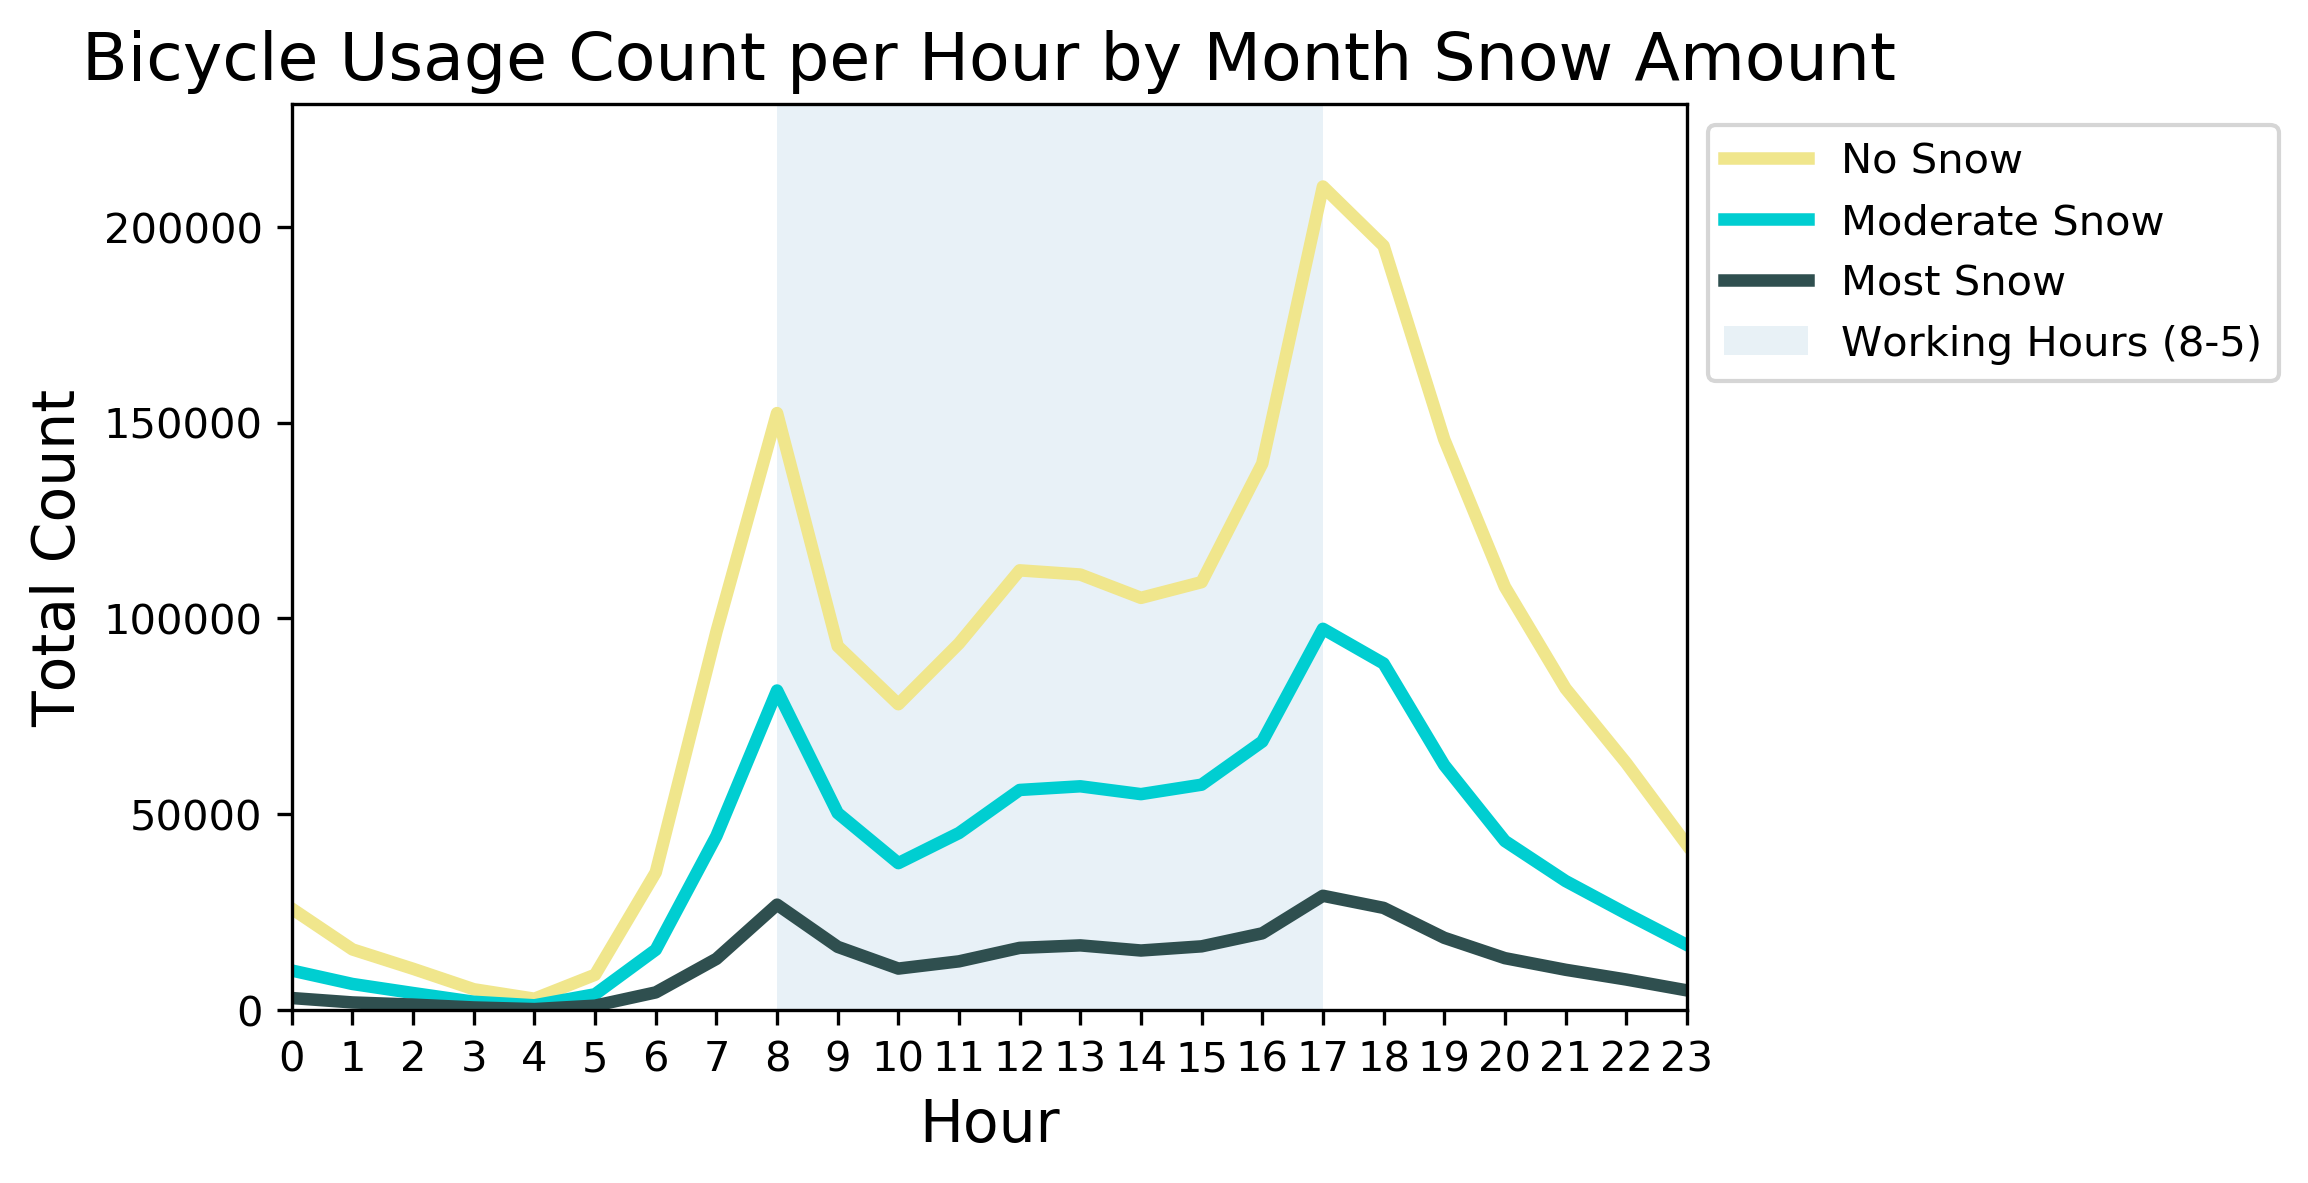

In [11]:
# Split up df into snow amounts
snow_df = bike_sharing_df[['hr', 'no_snow', 'medium_snow', 'heavy_snow', 'cnt']]
no_df = snow_df.loc[bike_sharing_df['no_snow'] == 1]
medium_df = snow_df.loc[bike_sharing_df['medium_snow'] == 1]
heavy_df = snow_df.loc[bike_sharing_df['heavy_snow'] == 1]

# Groupby hr
no_gk = no_df[['hr', 'cnt']].groupby('hr')
medium_gk = medium_df[['hr', 'cnt']].groupby('hr')
heavy_gk = heavy_df[['hr', 'cnt']].groupby('hr')

# Sums for each hour
no_XY = no_gk.sum()
medium_XY = medium_gk.sum()
heavy_XY = heavy_gk.sum()

# X + Y's
X = no_XY.index.values.tolist()
no_Y = no_XY.cnt
medium_Y = medium_XY.cnt
heavy_Y = heavy_XY.cnt

# Plot change in count over hour for both weekdays and weekends for each season
plt.plot(X, no_Y, color='khaki', lw=3, label='No Snow')
plt.plot(X, medium_Y, color='darkturquoise', lw=3, label='Moderate Snow')
plt.plot(X, heavy_Y, color='darkslategrey', lw=3, label='Most Snow')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(no_Y) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour by Month Snow Amount', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(no_Y) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

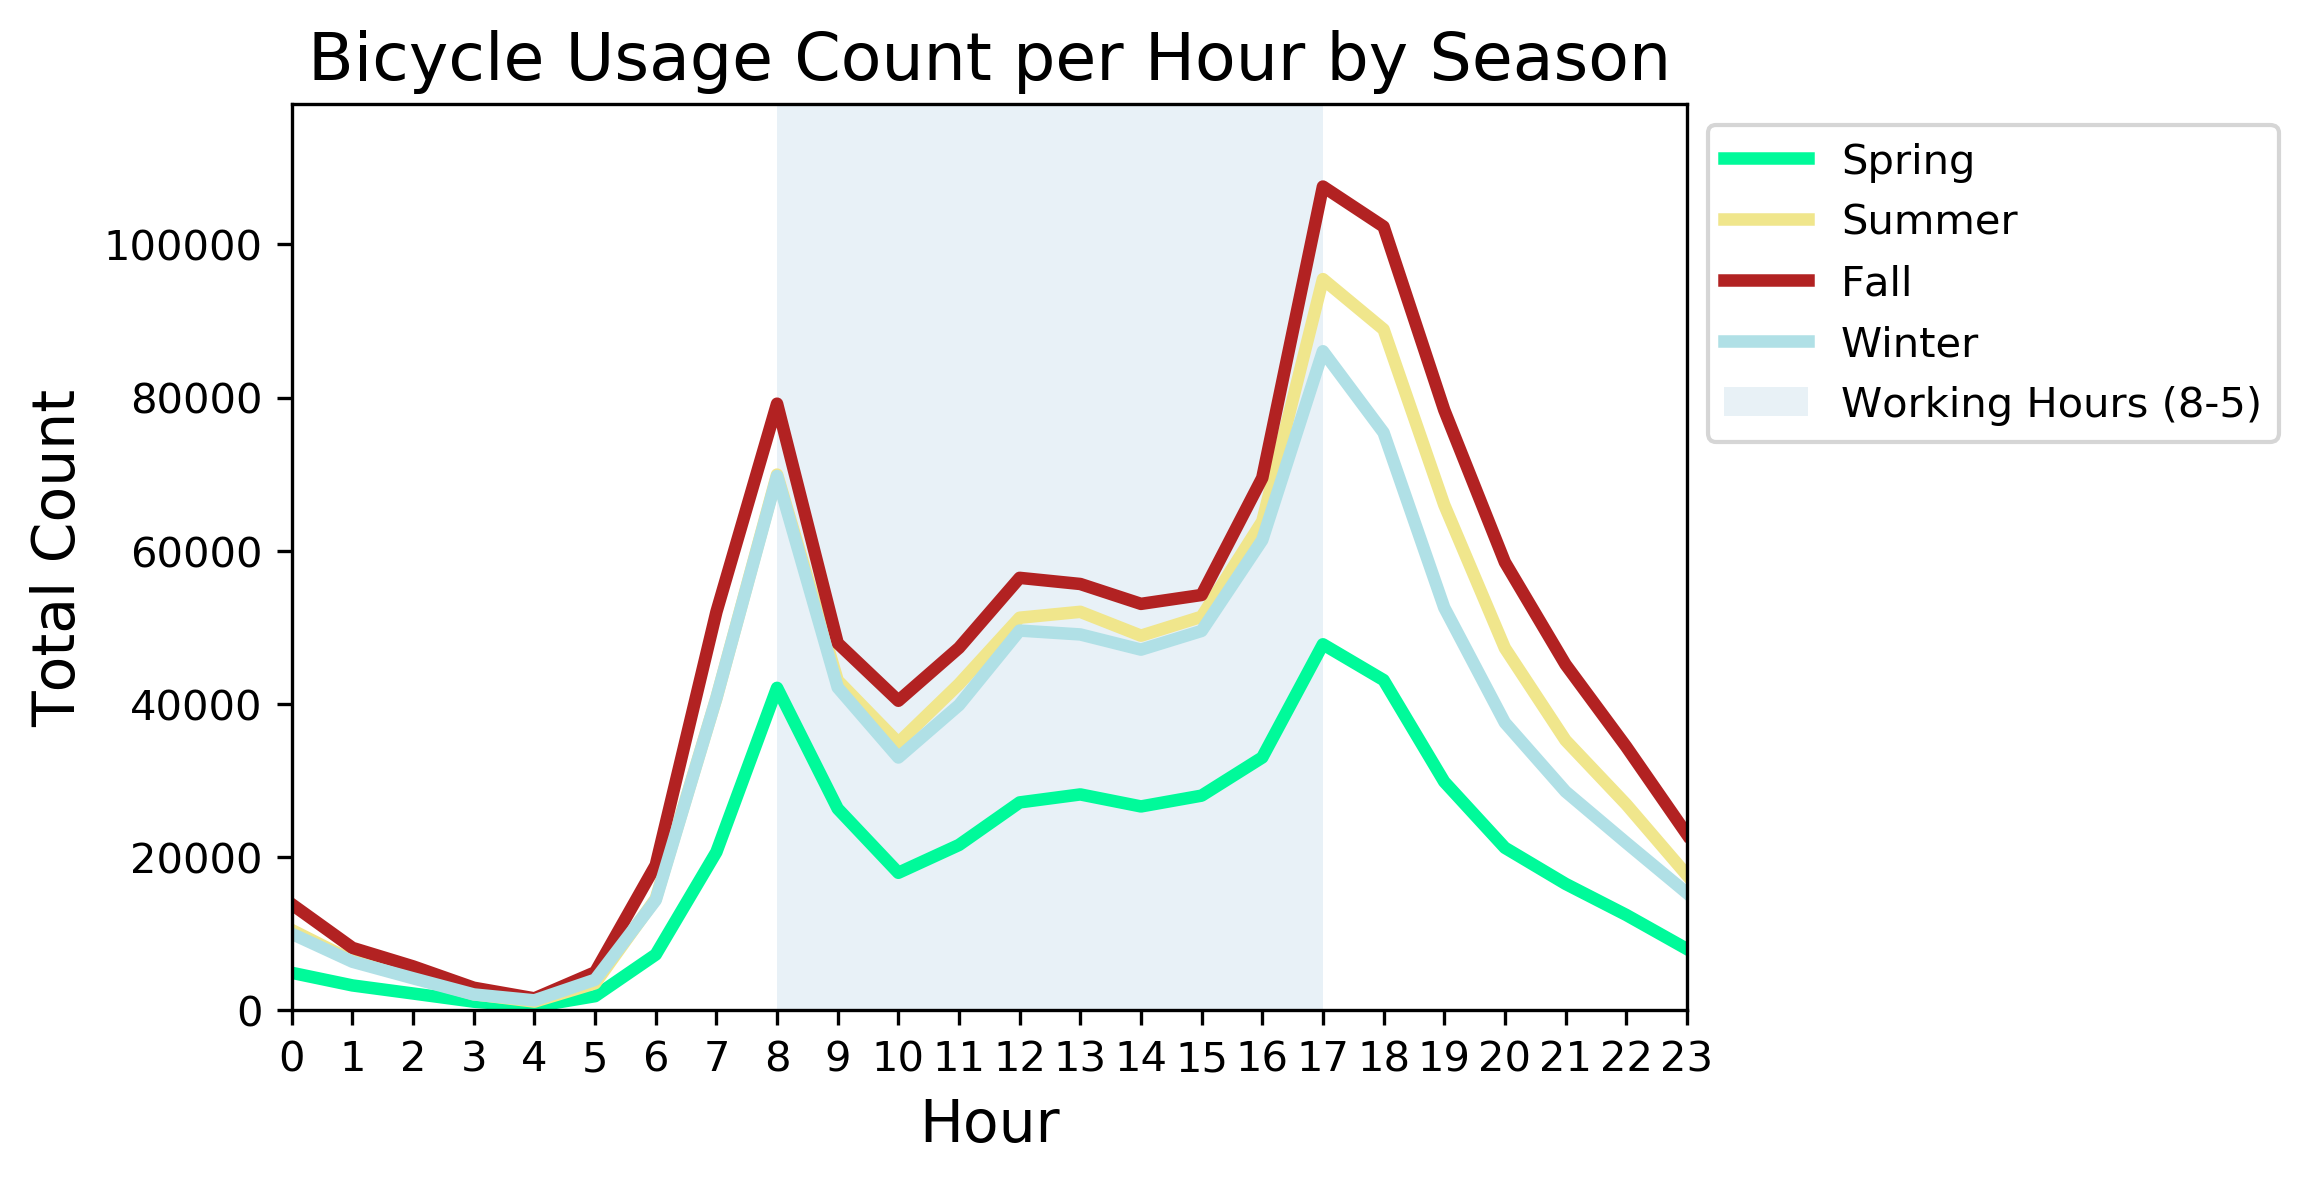

In [118]:
# Split up df into seasons
season_df = bike_sharing_df_full[['hr', 'spring', 'summer', 'fall', 'winter', 'cnt']]
spring_df = season_df.loc[bike_sharing_df['spring'] == 1]
summer_df = season_df.loc[bike_sharing_df['summer'] == 1]
fall_df = season_df.loc[bike_sharing_df['fall'] == 1]
winter_df = season_df.loc[bike_sharing_df['winter'] == 1]

# Groupby hr
spring_gk = spring_df[['hr', 'cnt']].groupby('hr')
summer_gk = summer_df[['hr', 'cnt']].groupby('hr')
fall_gk = fall_df[['hr', 'cnt']].groupby('hr')
winter_gk = winter_df[['hr', 'cnt']].groupby('hr')

# Sums for each hour
spring_XY = spring_gk.sum()
summer_XY = summer_gk.sum()
fall_XY = fall_gk.sum()
winter_XY = winter_gk.sum()

# X + Y's
X = spring_XY.index.values.tolist()
spring_Y = spring_XY.cnt
summer_Y = summer_XY.cnt
fall_Y = fall_XY.cnt
winter_Y = winter_XY.cnt

# Plot change in count over hour for both weekdays and weekends for each season
plt.plot(X, spring_Y, color='mediumspringgreen', lw=3, label='Spring')
plt.plot(X, summer_Y, color='khaki', lw=3, label='Summer')
plt.plot(X, fall_Y, color='firebrick', lw=3, label='Fall')
plt.plot(X, winter_Y, color='powderblue', lw=3, label='Winter')

# Fill in for working hours
plt.fill_between(range(8,18), 0, max(fall_Y) * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour by Season', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0,max(fall_Y) * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

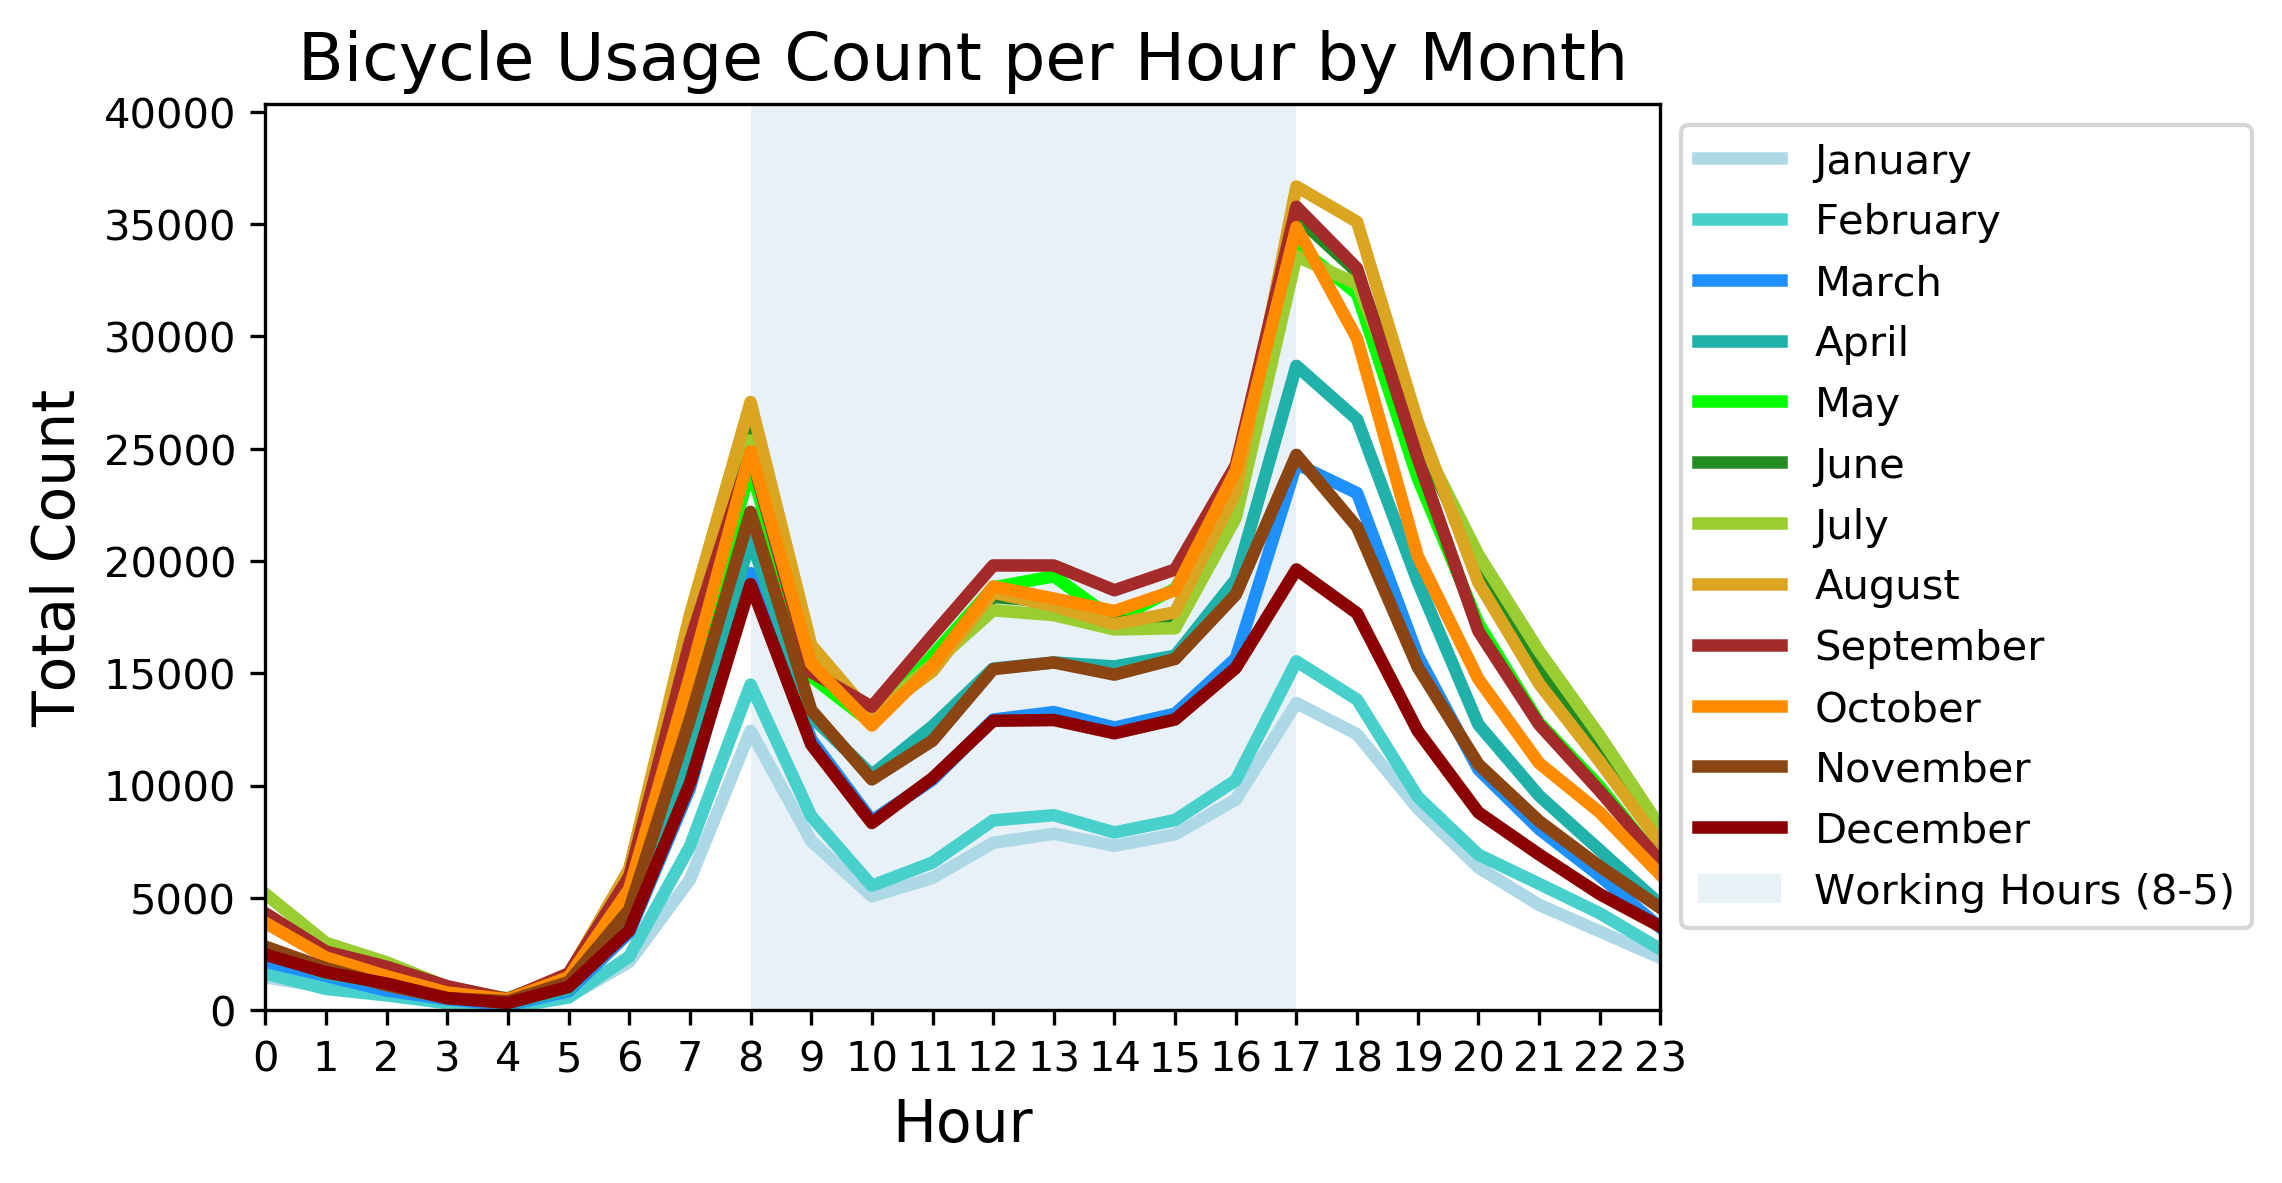

In [11]:
# Split up df into months
month_df = bike_sharing_df_full[['hr', 'mnth', 'cnt']]

labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['lightblue', 'mediumturquoise', 'dodgerblue', 'lightseagreen', 'lime', 'forestgreen', 'yellowgreen', 'goldenrod', 'brown', 'darkorange', 'saddlebrown', 'darkred']

max_Y = 0
for i in range(12):
    gk = (month_df.loc[month_df.mnth == i + 1])[['hr', 'cnt']].groupby('hr')
    XY = gk.sum()
    X = XY.index.values.tolist()
    Y = XY.cnt
    max_Y = max(max_Y, max(Y))
    plt.plot(X, Y, color=colors[i], lw=3, label=labels[i])

# Fill in for working hours
plt.fill_between(range(8,18), 0, max_Y * 1.1, alpha=0.1, label='Working Hours (8-5)')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count per Hour by Month', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(np.arange(len(X)))

# Bounding graph values
plt.xlim([0,23])
plt.ylim([0, max_Y * 1.1])

# Legend
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

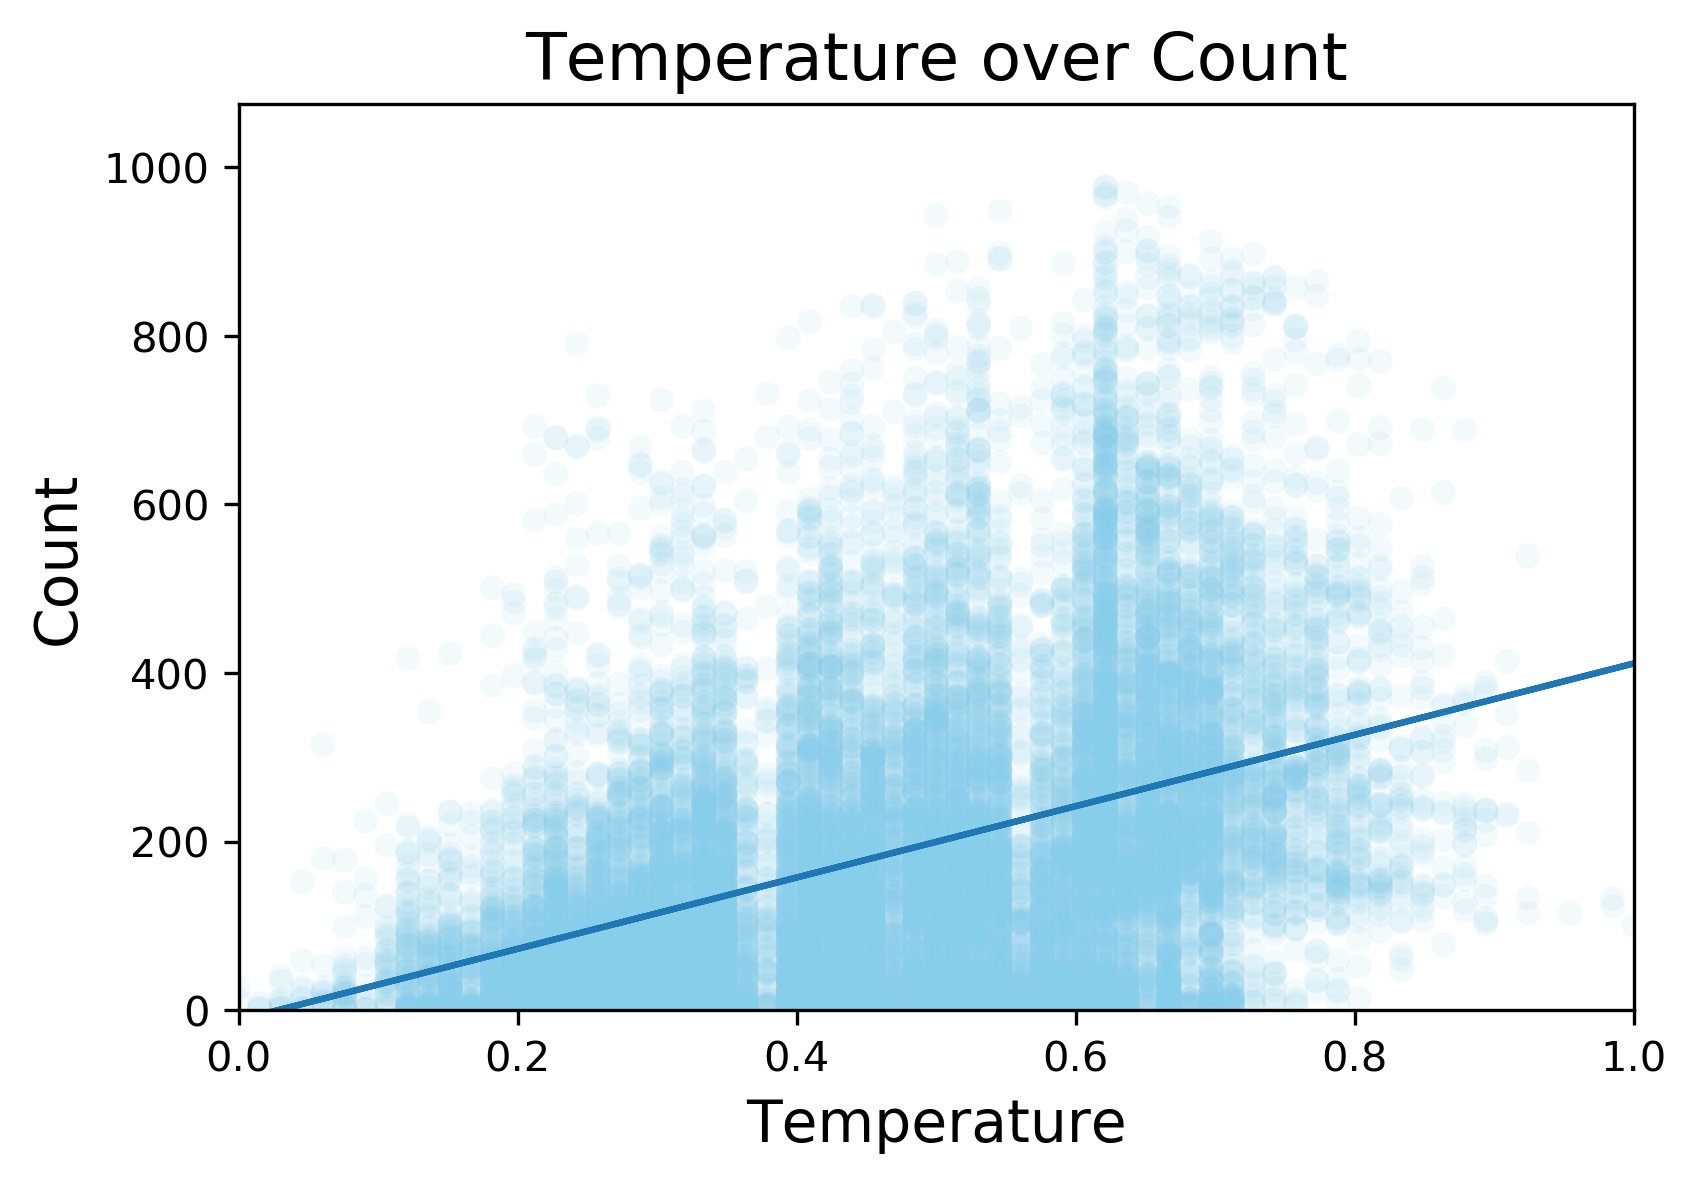

In [30]:
# Scatter
temp = plt.scatter(bike_sharing_df.atemp, bike_sharing_df.cnt, 
                   c="skyblue", alpha=0.1, edgecolors='none')

# Regression
m, b = np.polyfit(bike_sharing_df.atemp, bike_sharing_df.cnt, 1)
plt.plot(bike_sharing_df.atemp, m*bike_sharing_df.atemp + b)

# Plot beautification
# Labels
plt.title('Temperature over Count', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Bounding graph values
plt.xlim([0,1.0])
plt.ylim([0, max(bike_sharing_df.cnt) * 1.1])

plt.show()

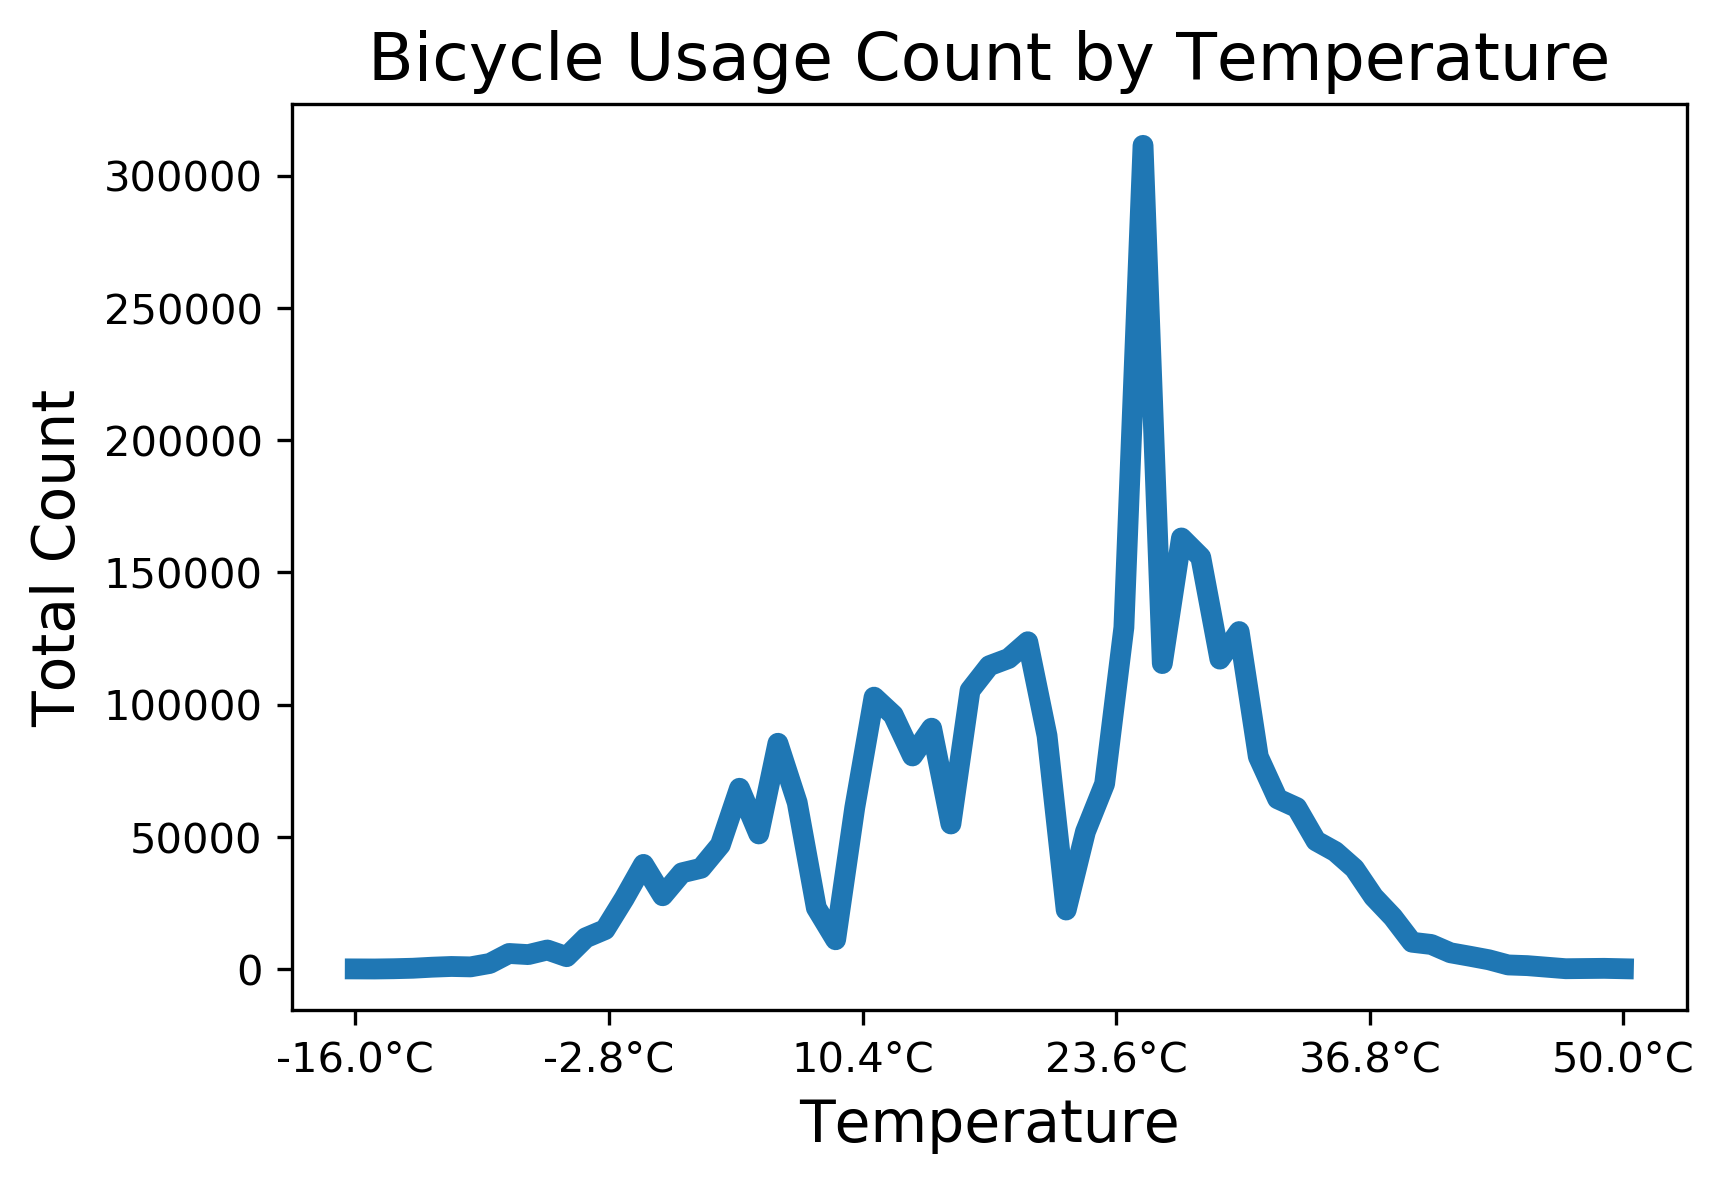

In [12]:
# Sum for each hour
temp_df = bike_sharing_df[['atemp','cnt']]
temp_gk = temp_df.groupby('atemp')
temp_XY = temp_gk.sum()

# Plot change in count over hour
plt.plot(temp_XY.index.values.tolist(), temp_XY.cnt, lw=5, label='Temperature')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count by Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

xTicksNormalized = [round(i * 0.2, 1) for i in range(6)]
xTicks = [str(round((66 * i) - 16, 1)) + '\N{DEGREE SIGN}C' for i in xTicksNormalized]
plt.xticks(xTicksNormalized, xTicks)

plt.show()

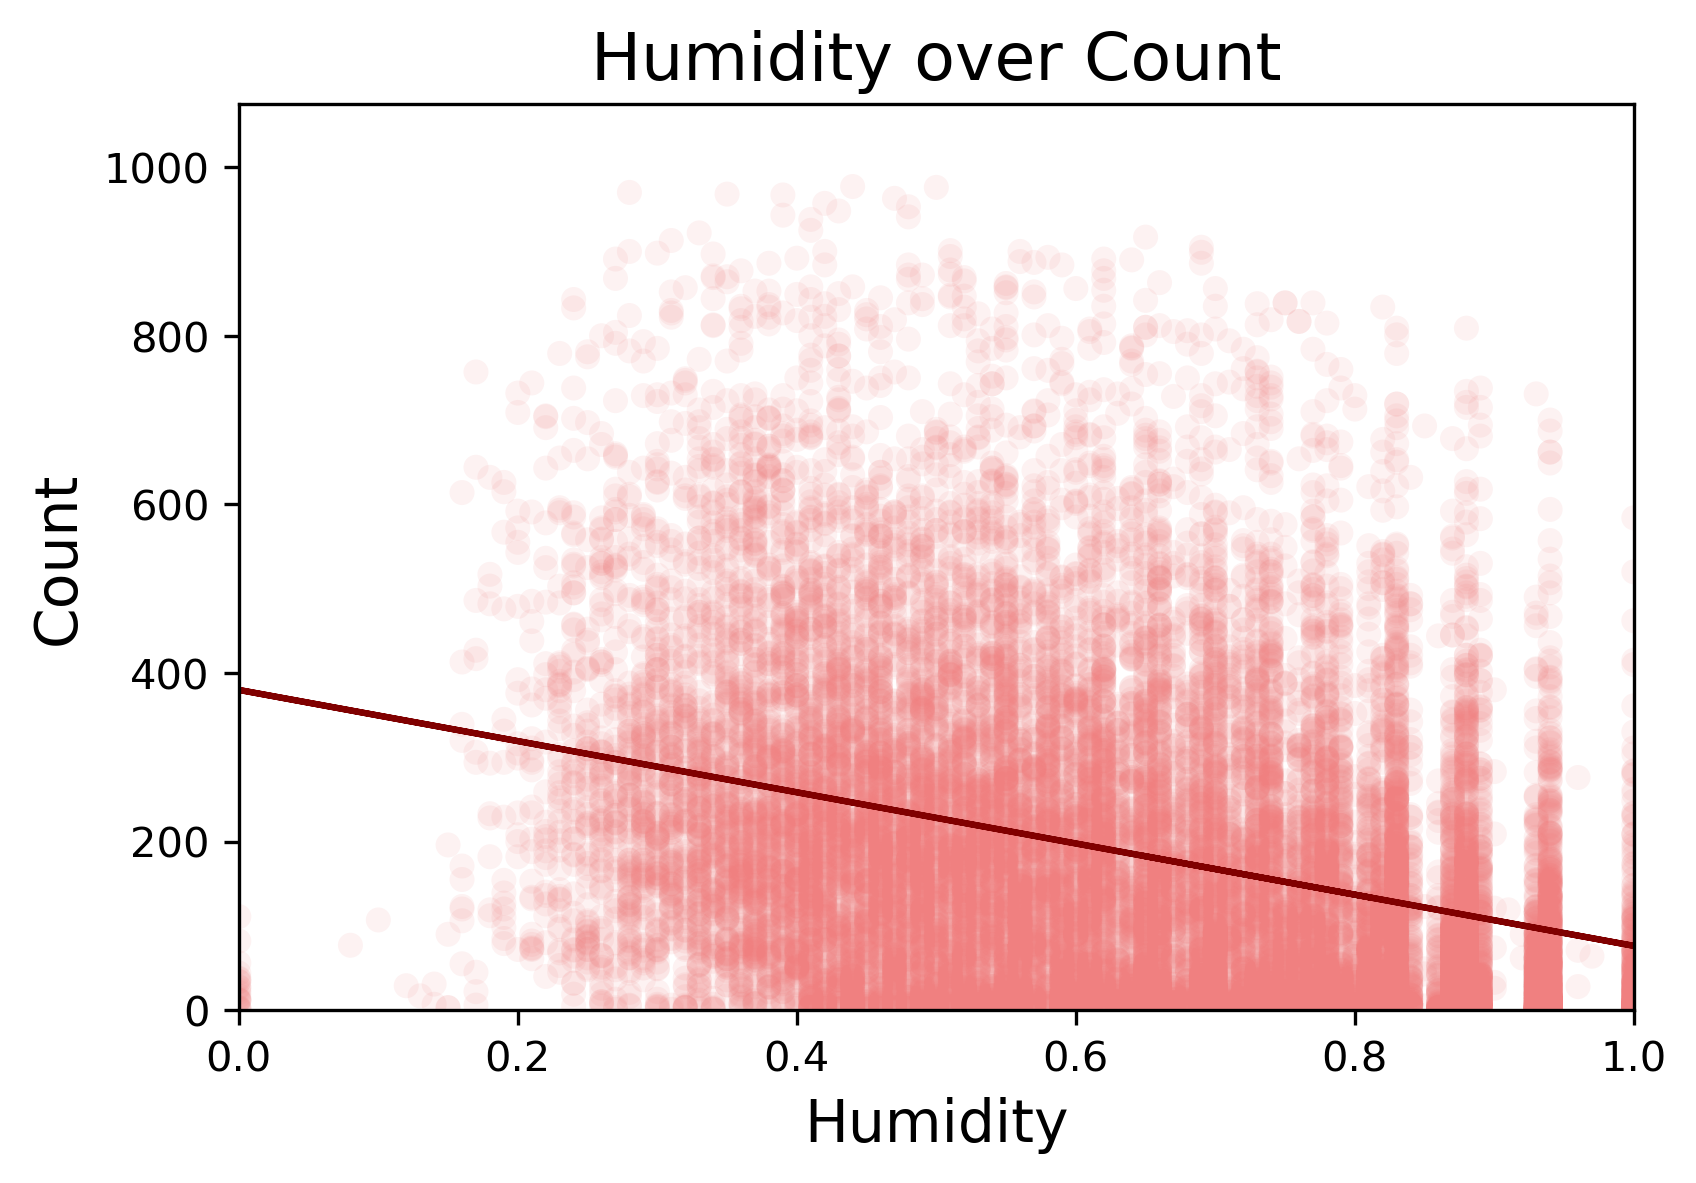

In [32]:
# Scatter
temp = plt.scatter(bike_sharing_df.hum, bike_sharing_df.cnt, 
                   c="lightcoral", alpha=0.1, edgecolors='none')

# Regression
m, b = np.polyfit(bike_sharing_df.hum, bike_sharing_df.cnt, 1)
plt.plot(bike_sharing_df.hum, m*bike_sharing_df.hum + b, color="maroon")

# Plot beautification
# Labels
plt.title('Humidity over Count', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Bounding graph values
plt.xlim([0,1.0])
plt.ylim([0, max(bike_sharing_df.cnt) * 1.1])

plt.show()

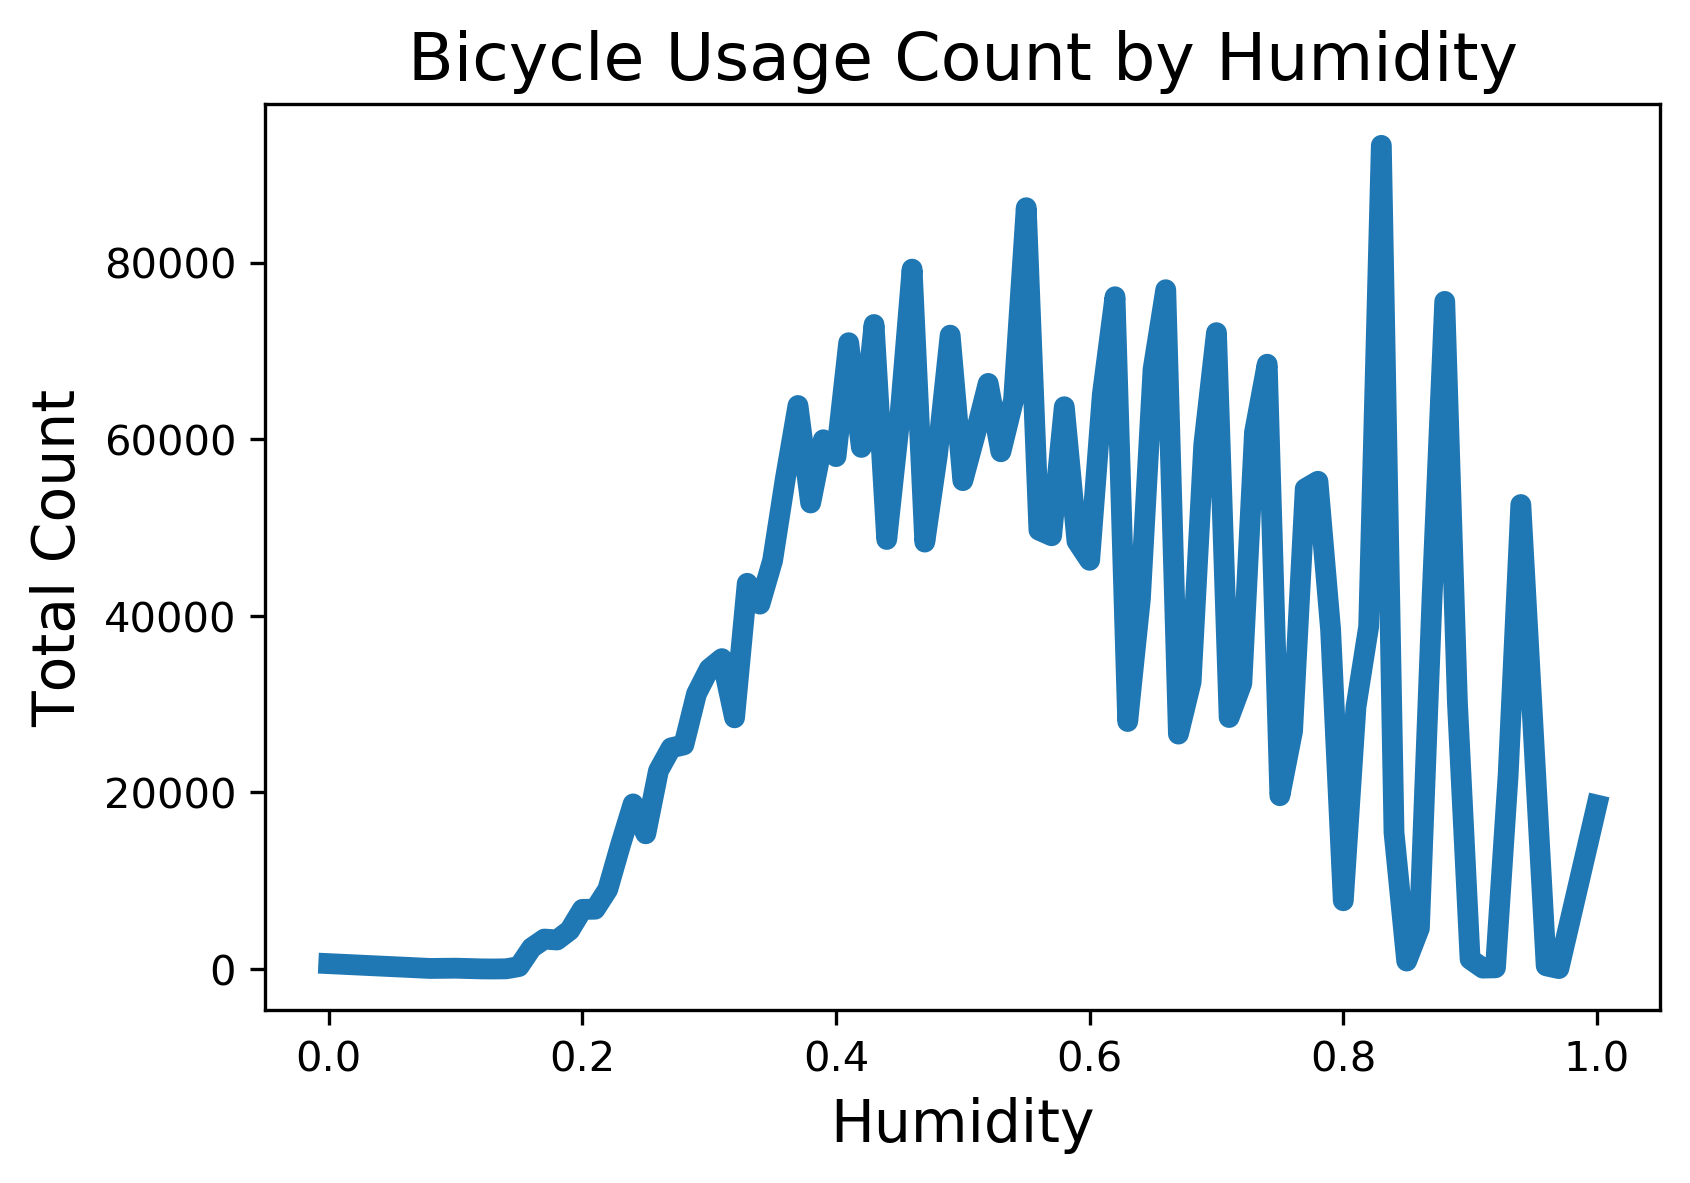

In [13]:
# Sum for each hour
hum_df = bike_sharing_df[['hum','cnt']]
hum_gk = hum_df.groupby('hum')
hum_XY = hum_gk.sum()

# Plot change in count over hour
plt.plot(hum_XY.index.values.tolist(), hum_XY.cnt, lw=5, label='Humidity')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count by Humidity', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

plt.show()

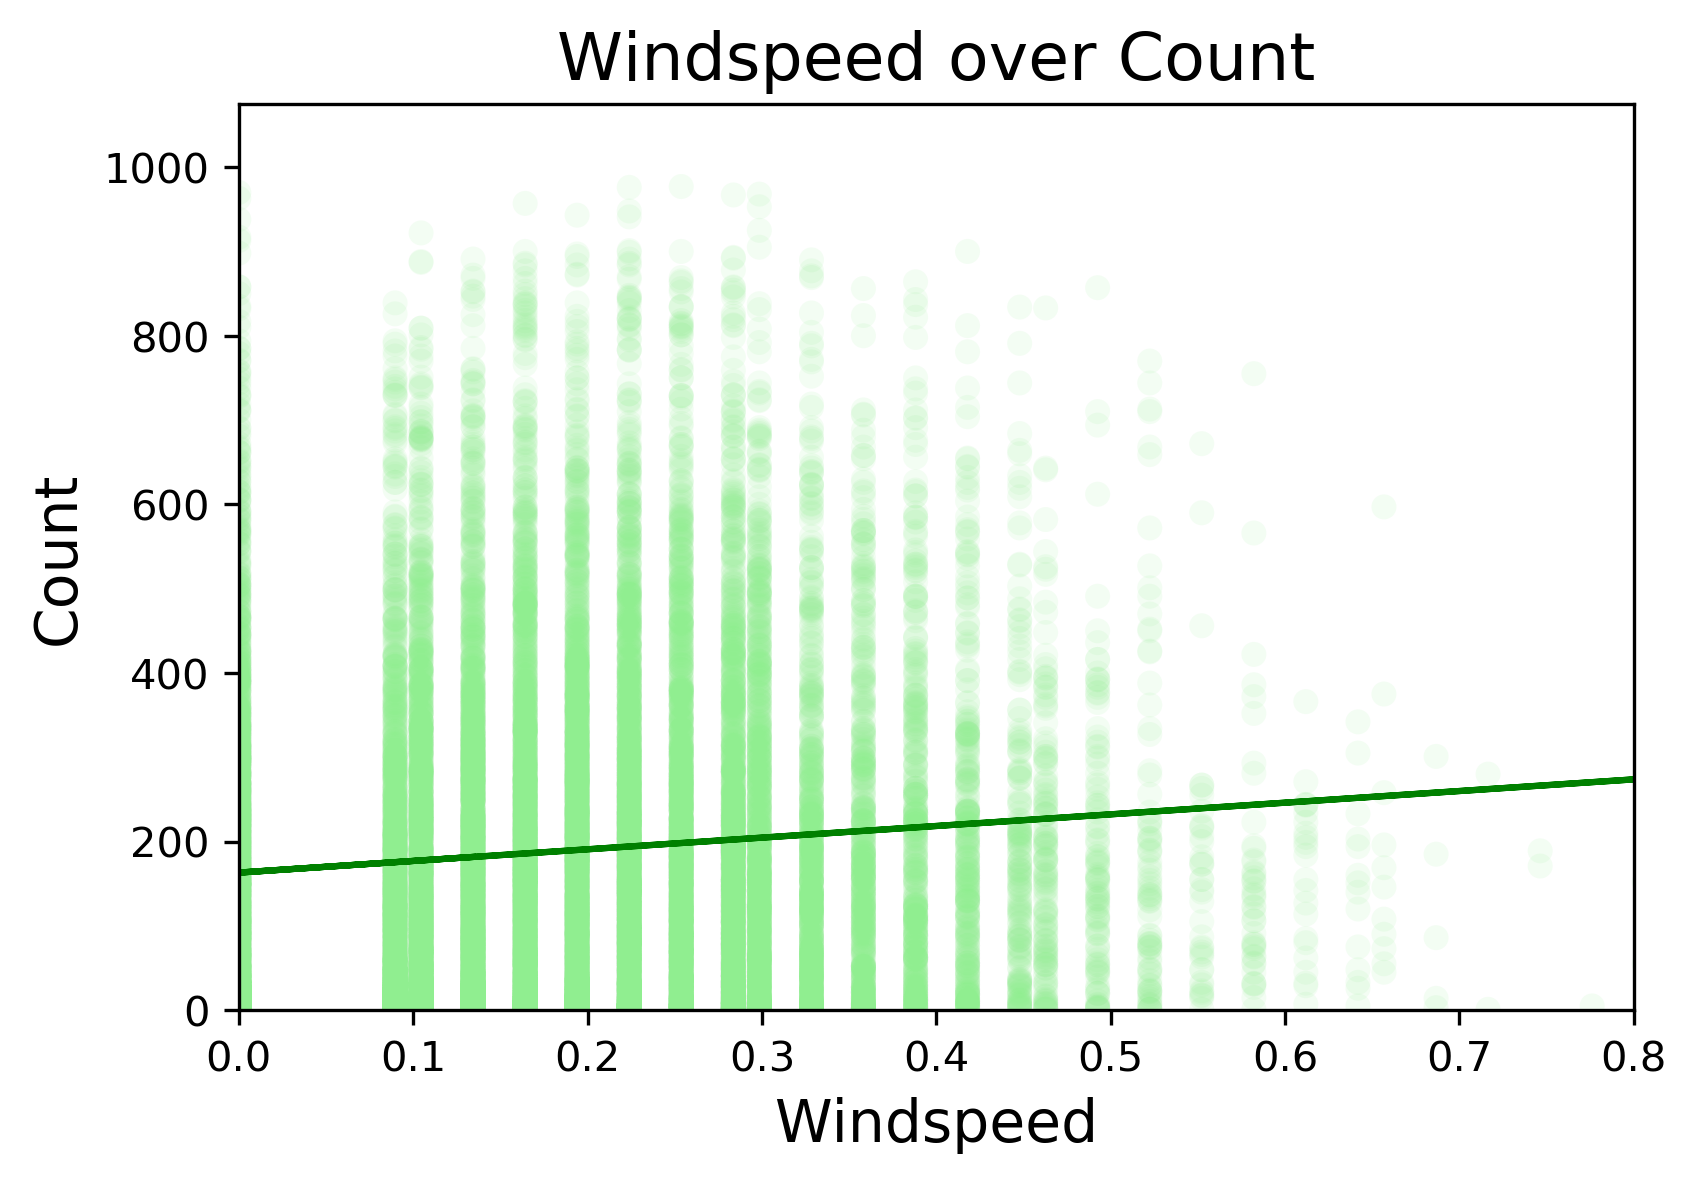

In [34]:
# Scatter
temp = plt.scatter(bike_sharing_df.windspeed, bike_sharing_df.cnt, 
                   c="lightgreen", alpha=0.1, edgecolors='none')

# Regression
m, b = np.polyfit(bike_sharing_df.windspeed, bike_sharing_df.cnt, 1)
plt.plot(bike_sharing_df.windspeed, m*bike_sharing_df.windspeed + b, color="green")

# Plot beautification
# Labels
plt.title('Windspeed over Count', fontsize=16)
plt.xlabel('Windspeed', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Bounding graph values
plt.xlim([0,0.8])
plt.ylim([0, max(bike_sharing_df.cnt) * 1.1])

plt.show()

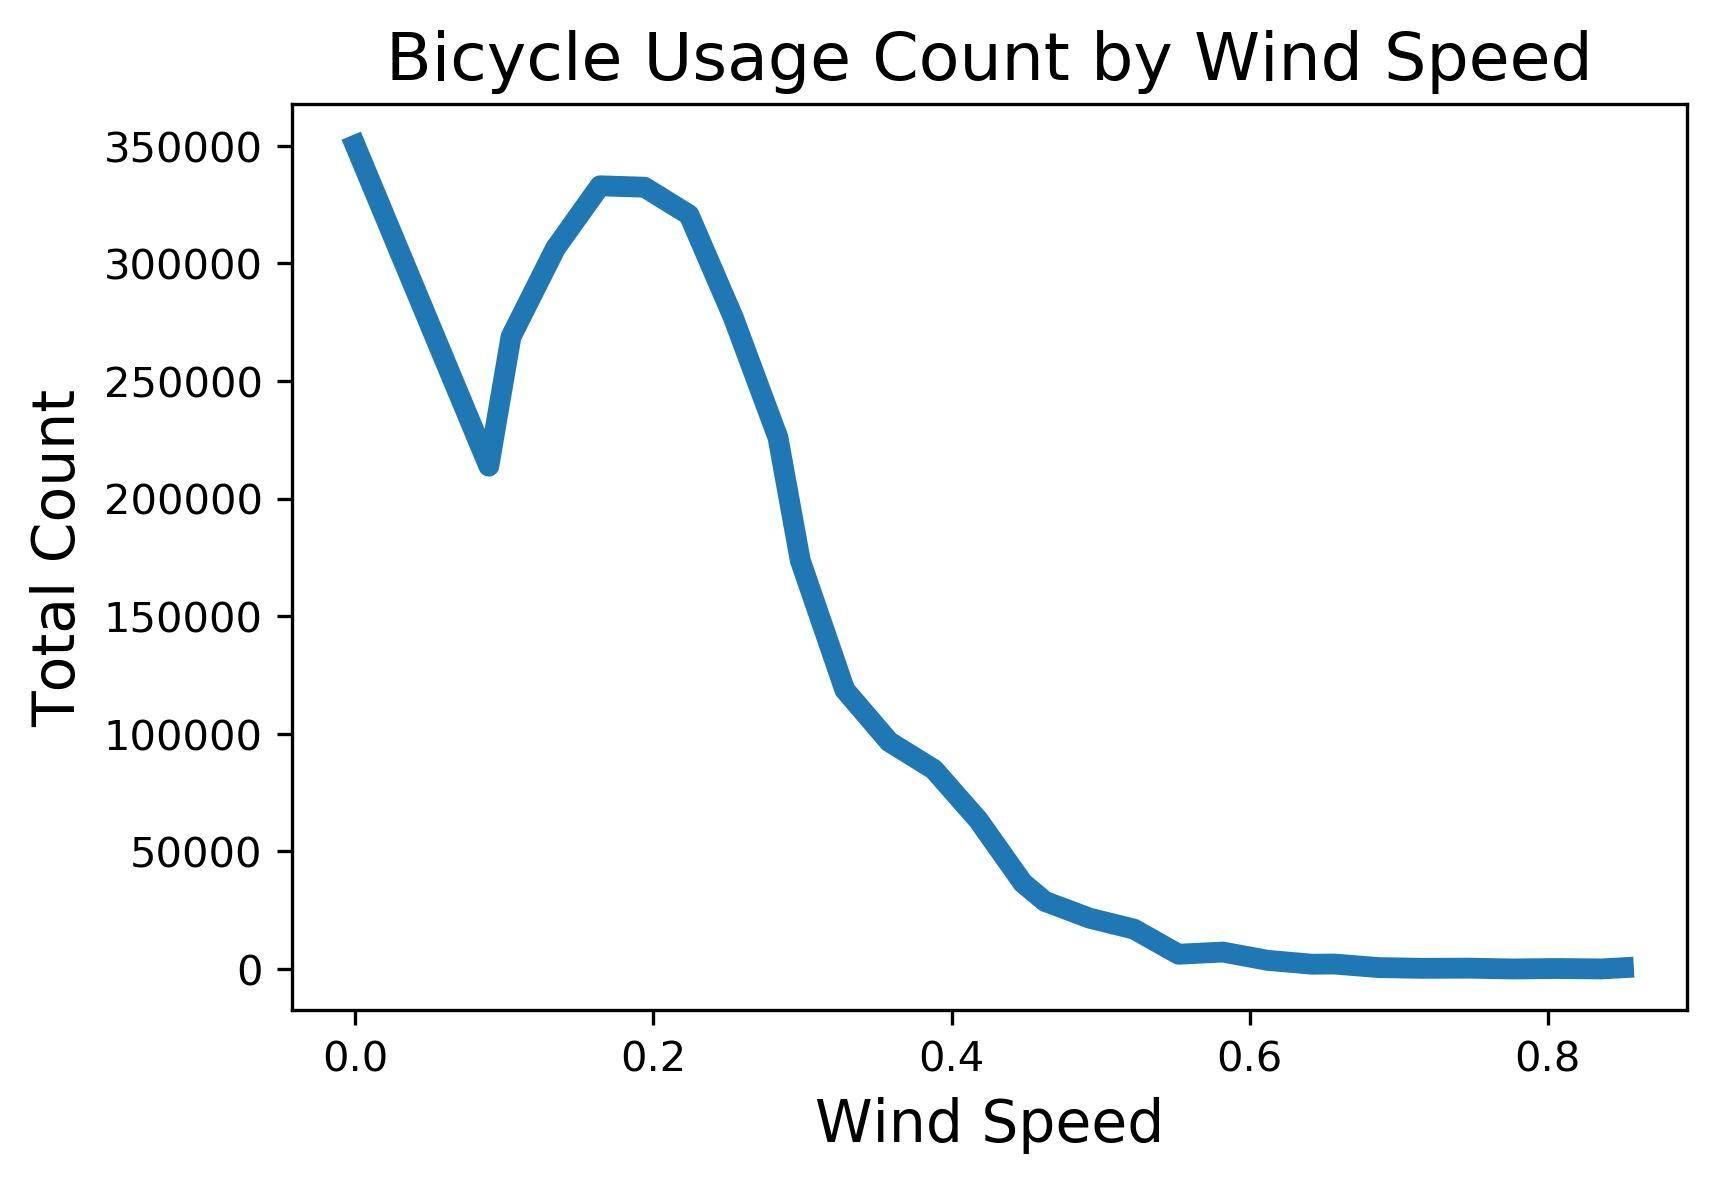

In [15]:
# Sum for each hour
wind_df = bike_sharing_df[['windspeed','cnt']]
wind_gk = wind_df.groupby('windspeed')
wind_XY = wind_gk.sum()

# Plot change in count over hour
plt.plot(wind_XY.index.values.tolist(), wind_XY.cnt, lw=5, label='Wind Speed')

# Plot beautification
# Labels
plt.title('Bicycle Usage Count by Wind Speed', fontsize=16)
plt.xlabel('Wind Speed', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

plt.show()